# **Introduction**

In this study, we analyze patient data to find out how blood glucose levels relate to other health factors. We're using Canonical Correlation Analysis (CCA) to discover which variables are most connected to blood glucose. Then we will use Time Series Covariate method for predictive modelling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Objective**

The objective of this research is to apply Canonical Correlation Analysis (CCA) to explore and quantify the multivariate relationships between key physiological variables, with a specific focus on identifying those that are highly correlated with blood glucose levels. The identified variables will be used in a comprehensive suite of model building techniques including Time Series Covariate Modeling, Two-Stage Modeling. At the conclusion of this study, we will compare the results of these models to identify the most suitable model for predicting and managing diabetes care.

# Libraries

In [ ]:
# Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Description of the Data set**

## Train Data Set

Since only Train Data set contain the target variable - bg+1:00, we will only be using the this set, in Exploratory Data Analysis, and Canonical Correlation. Then we move on to use the same data set in predictive modelling. This data set will be divided in to train set and test set later predictive modelling section.


In [ ]:
diabetes_train = pd.read_csv("/content/drive/MyDrive/DANA CAPSTONE/train.csv")
diabetes_train.head()

<ipython-input-3-8314c0b499ea>:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_train = pd.read_csv("/content/drive/MyDrive/DANA CAPSTONE/train.csv")


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [ ]:
# Count NaNs in each column
nan_counts = diabetes_train.isna().sum()

# Print out the counts of NaNs per column where counts are greater than 0
print("Count of NaNs in each column with NaNs:")
print(nan_counts[nan_counts > 0])

Count of NaNs in each column with NaNs:
bg-5:55           27254
bg-5:50           18491
bg-5:45           13660
bg-5:40           27258
bg-5:35           18770
                  ...  
activity-0:20    174270
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
Length: 504, dtype: int64


In [ ]:
column_names = diabetes_train.columns.tolist()

print("Column names in the dataset:", column_names)

Column names in the dataset: ['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35', 'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10', 'bg-5:05', 'bg-5:00', 'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40', 'bg-4:35', 'bg-4:30', 'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10', 'bg-4:05', 'bg-4:00', 'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40', 'bg-3:35', 'bg-3:30', 'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10', 'bg-3:05', 'bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-5:55', 'insulin-5:50', 'insulin-5:45', 'insulin-5:40', 'insulin-5:35', 'insulin-5:30', 'insulin-5:25', 'insulin-5:20', 'insulin-5:15', 'insulin-5:

In [ ]:
print(diabetes_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB
None


This dataset contains 7 categories of features including blood glucose level, insulin level, carbs, heart rate, steps, calories count, activity type. Under each category values for each variable in a 5 minute duration are recorded.

id - row id consisting of participant number and a count for that participant

p_num - participant number

time - time of day in the format HH:MM:SS

bg-X:XX - blood glucose reading in mmol/L, X:XX(H:MM) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor

insulin-X:XX - total insulin dose received in units in the last 5 minutes, X:XX(H:MM) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump

carbs-X:XX - total carbohydrate value consumed in grammes in the last 5 minutes.

hr-X:XX - mean heart rate in beats per minute in the last 5 minutes.

steps-X:XX - total steps walked in the last 5 minutes.

cals-X:XX - total calories burnt in the last 5 minutes, X:XX(H:MM) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch

activity-X:XX - self-declared activity performed in the last 5 minutes

bg+1:00 - blood glucose reading in mmol/L an hour in the future

## Structure and Quality of the Dataset


The dataset comprises over 177024 entries across 508 columns, categorized into numerical and categorical types. A significant portion of the dataset contains missing values, especially in the 'activity' and 'carbs' categories, which we will impute using a suitable imputation method, based on the analysis of EDA







# **Exploratory Data Analysis**

EDA is crucial as it allows to understand the underlying patterns, detect outliers, check assumptions, and test hypotheses about the data, ensuring that the results later obtained from the models are valid and applicable. EDA also helps in identifying errors or strange behavior in the datasets that might require correction.

## Missing Values Analysis

In [ ]:
missing_values = diabetes_train.isnull().sum()
total_rows = len(diabetes_train)

missing_percentage = (missing_values / total_rows) * 100

missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

print("Percentage of missing values in each column from highest to lowest:")
print(missing_percentage_sorted)


Percentage of missing values in each column from highest to lowest:
carbs-4:30    98.571945
carbs-4:00    98.569685
carbs-4:45    98.569121
carbs-4:15    98.568556
carbs-5:30    98.568556
                ...    
bg-0:00        1.522957
time           0.000000
p_num          0.000000
id             0.000000
bg+1:00        0.000000
Length: 508, dtype: float64


## Heatmaps for Missing Data Visualization

We use heatmaps to visualize missing data across different categories to better understand the nature and extent of missingness. This visualization aids in selecting appropriate imputation methods by highlighting specific patterns, such as gaps in data collection or systematic missingness in certain variables.

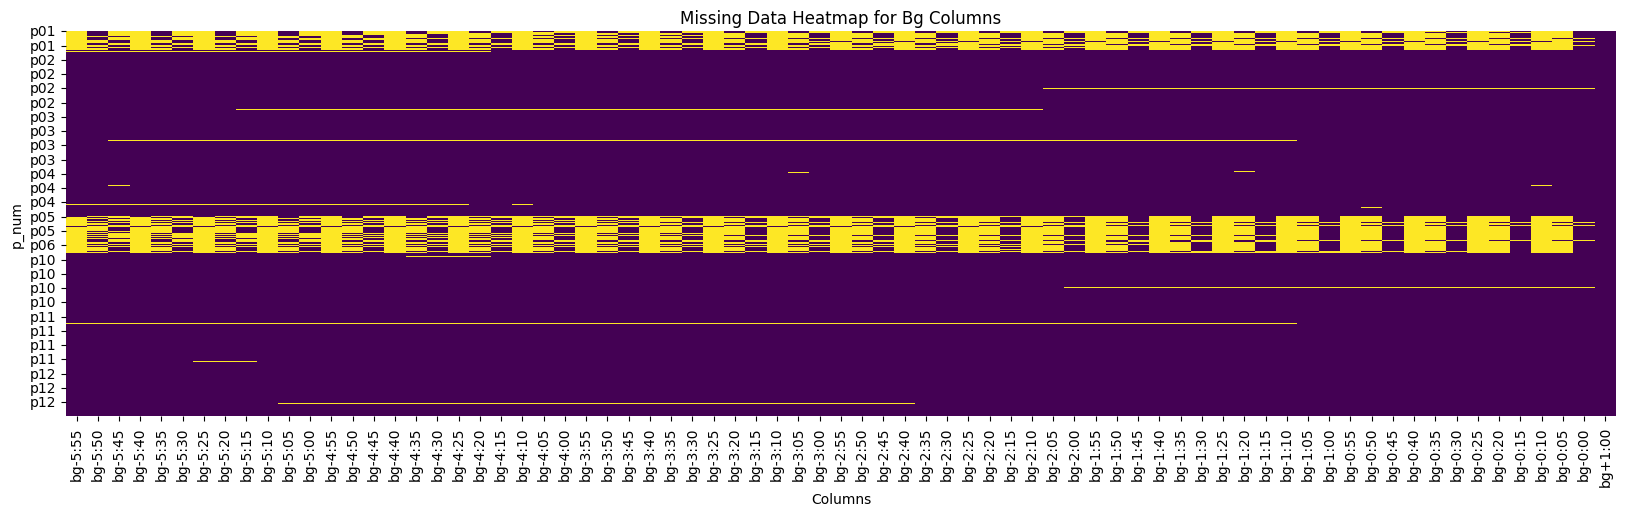

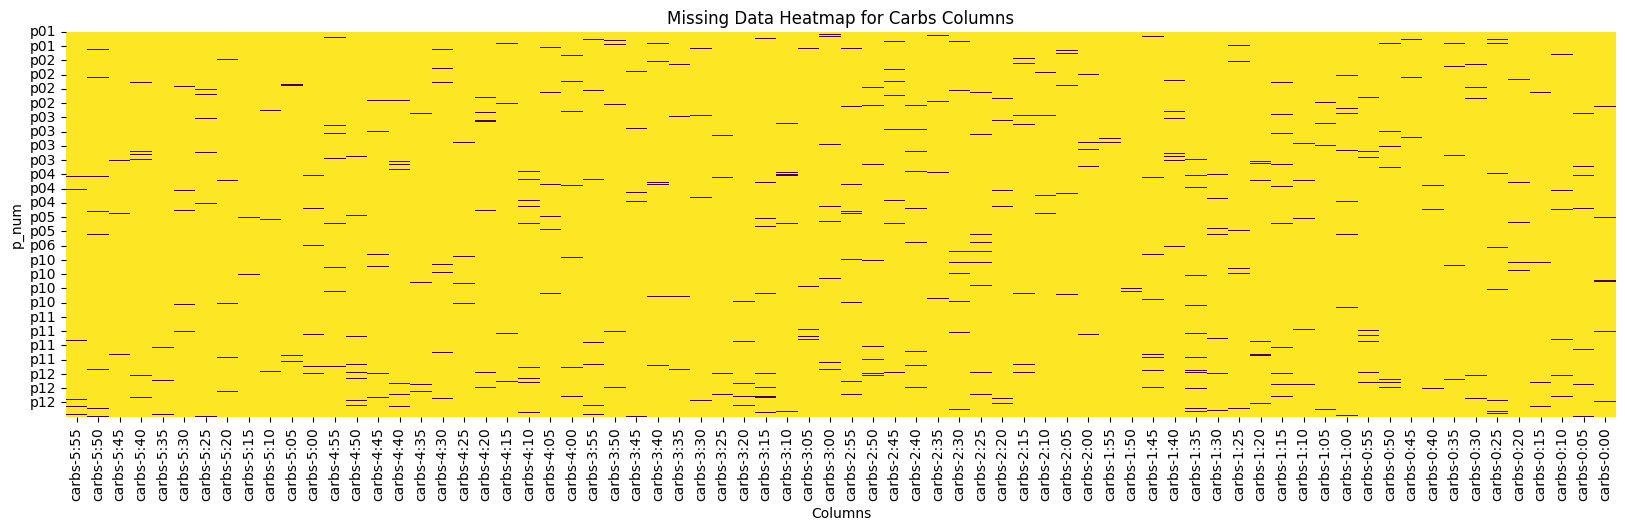

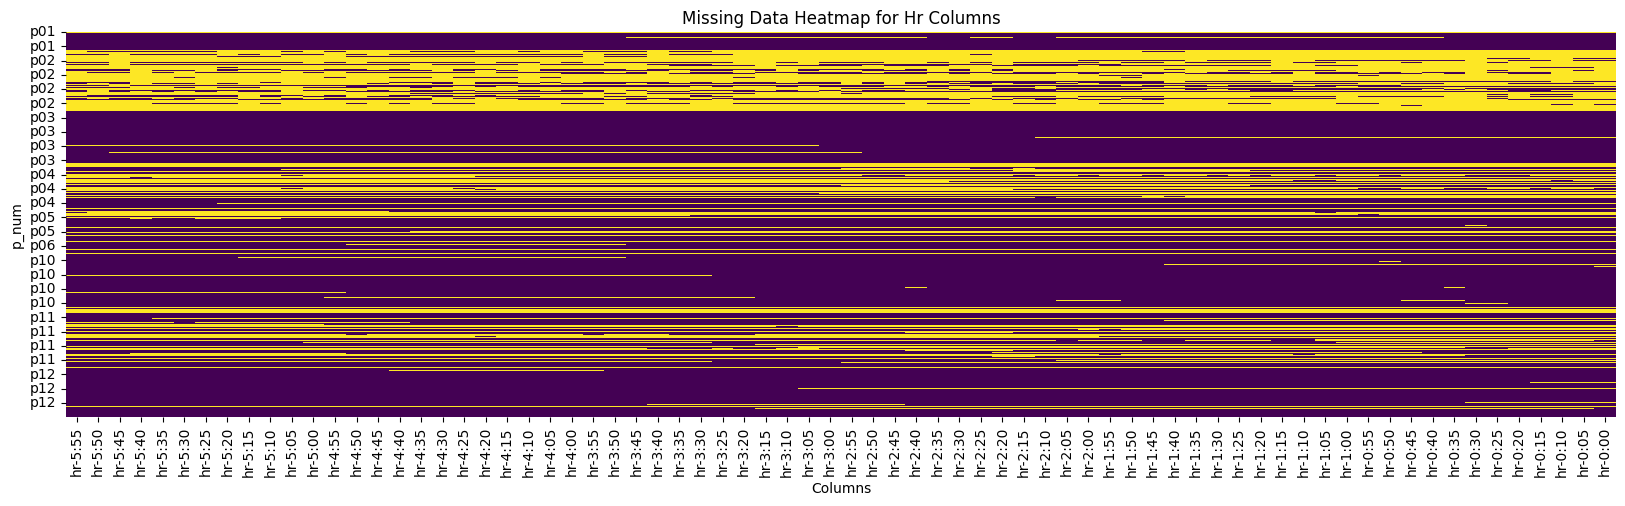

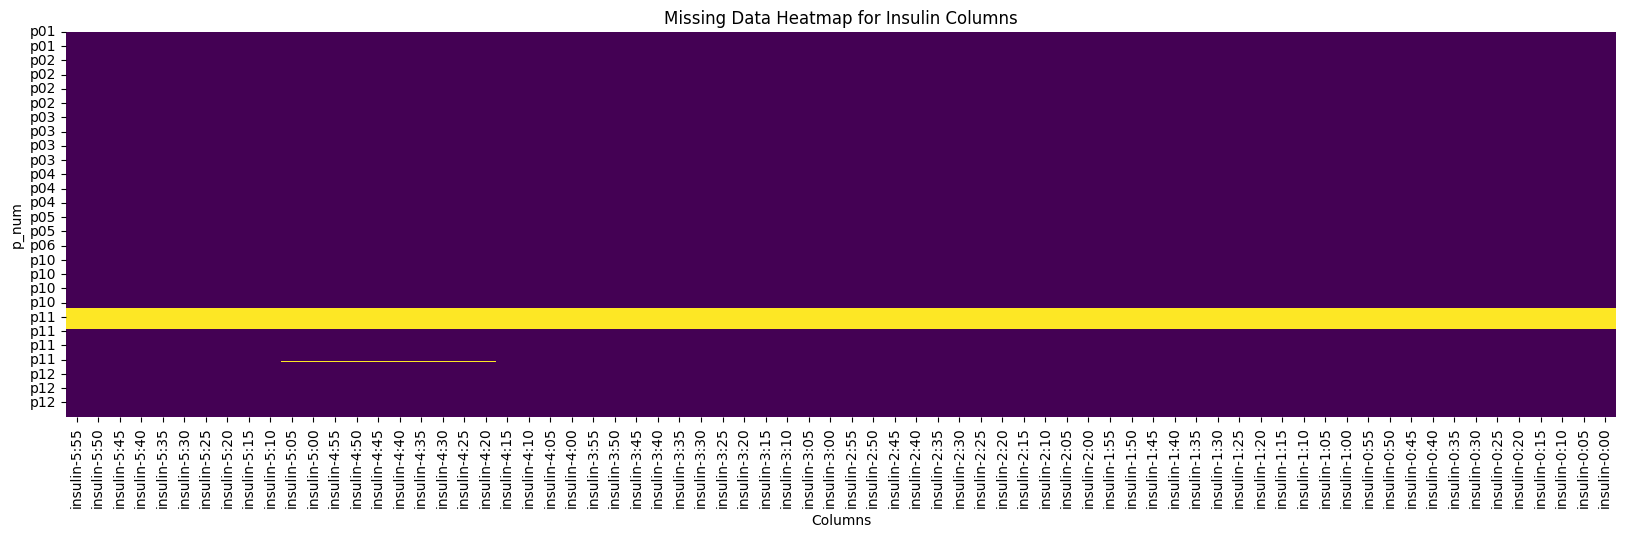

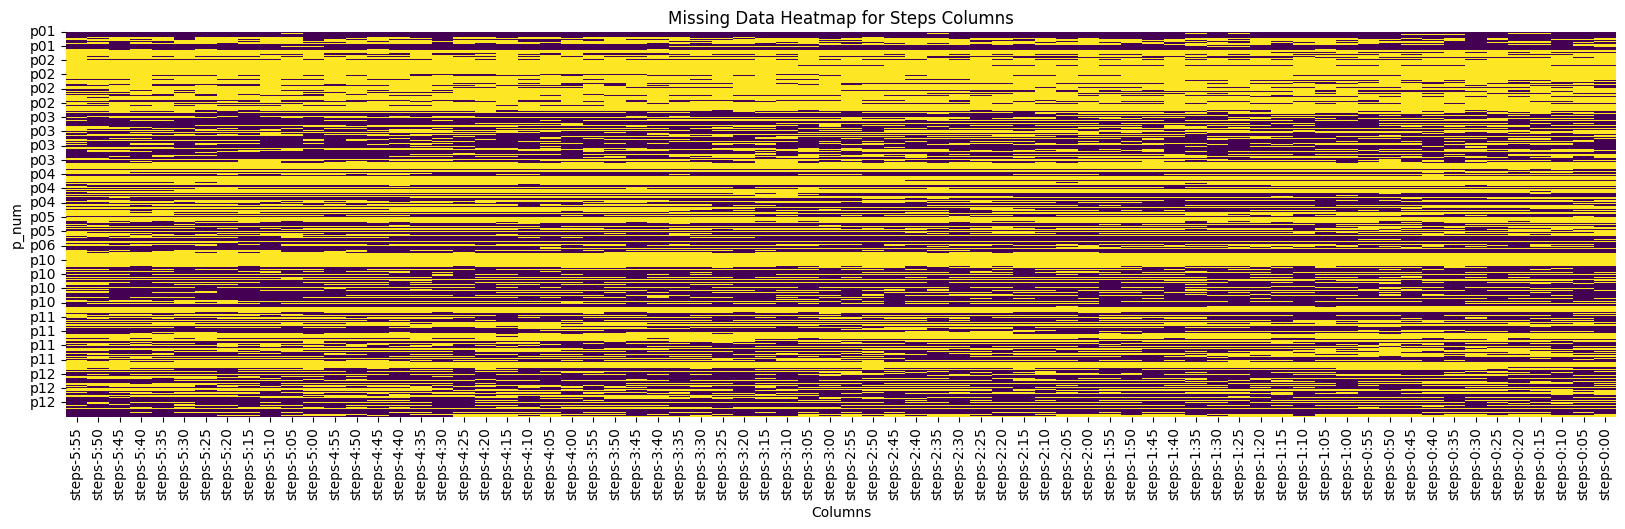

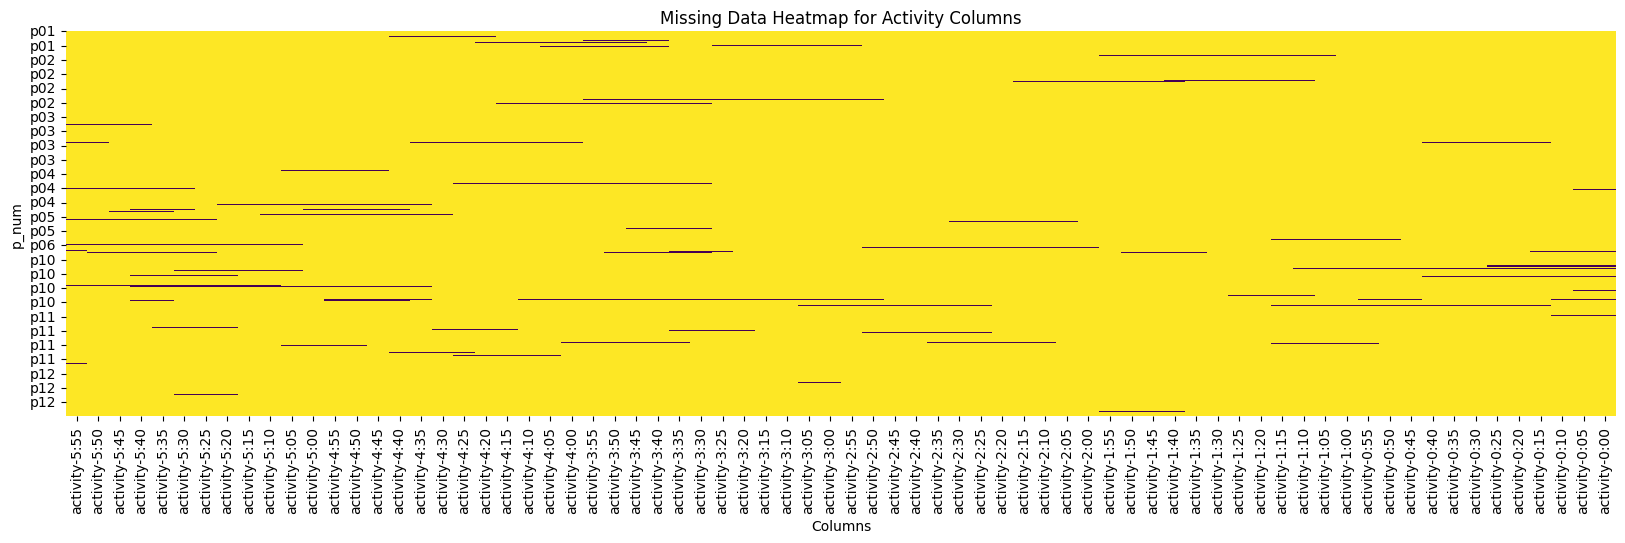

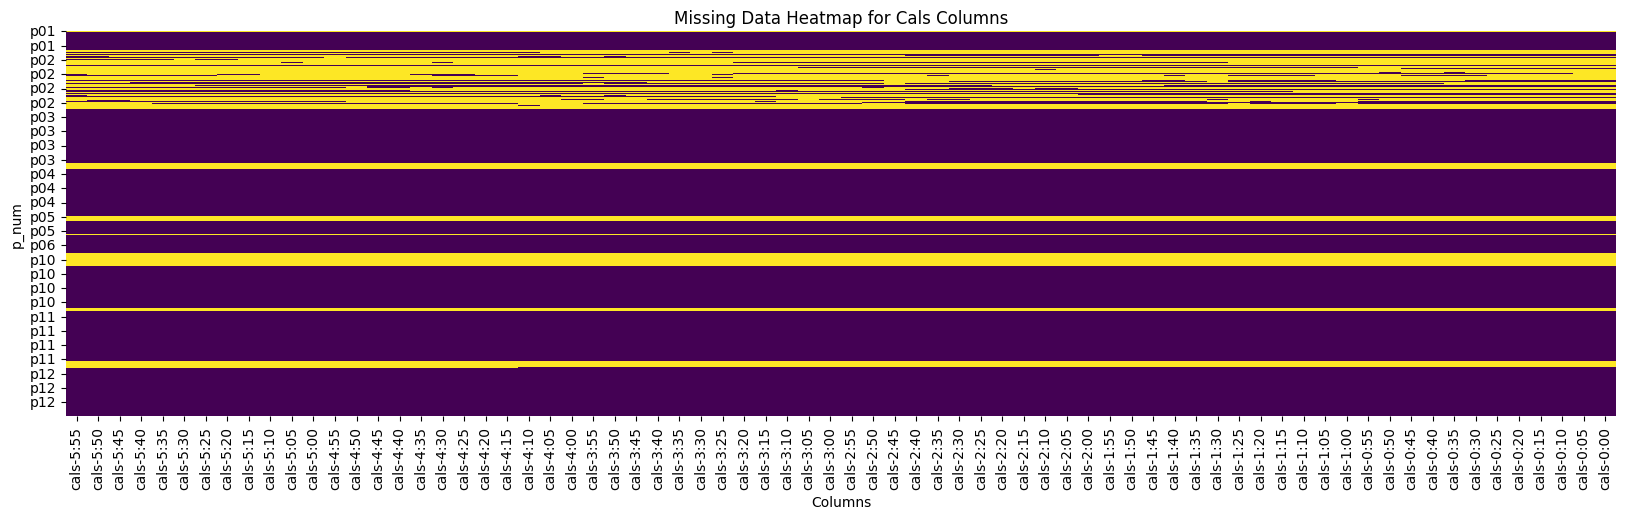

In [ ]:
diabetes_train.set_index('p_num', inplace=True, drop=False)

# Creating a list of patterns to match column groups
patterns = ['bg', 'carbs', 'hr', 'insulin', 'steps', 'activity', 'cals']

for pattern in patterns:
    pattern_columns = [col for col in diabetes_train.columns if pattern in col]
    if pattern_columns:
        missing_data = diabetes_train[pattern_columns].isnull()

        plt.figure(figsize=(20, 5))
        sns.heatmap(missing_data, cbar=False, cmap='viridis')
        plt.title(f'Missing Data Heatmap for {pattern.capitalize()} Columns')
        plt.xlabel('Columns')
        plt.ylabel('p_num')
        plt.show()


Blood Glucose (bg): The missing data pattern is consistent across different time intervals for the same patient, indicating that missingness may depend on the patient's condition or the time of day but not on the observed data alone.

Carbohydrates (carbs): There seems to be a regular pattern of missingness, possibly related to meal times.

Heart Rate (hr): The consistent lines of missing data across certain time intervals suggest that missingness may be influenced by the specific measurement times.

Insulin: The heatmap shows that entire periods or specific intervals have missing data, which could imply issues related to the measurement process or recording habits.

Steps: There is a distinct pattern of missing data which might be related to the time of day or the patient's activity schedule.


Upon examining the missing value heatmaps, we initially thought the data would predominantly be missing during nighttime hours. This assumption was based on the expectation that device data collection might be less consistent or interrupted during periods of sleep.

However, the pattern observed in the missing value heatmaps did not support this hypothesis. If the data were missing primarily due to nighttime inactivity, we would expect to see the missing values consistently appearing in the lower rows of the heatmap for all patients and clustered towards the right side of these rows. This pattern would reflect a uniform absence of data across all patients during the night.

Contrary to expectations, the missing values did not exhibit this pattern, indicating that the absence of data is not merely a function of nighttime inactivity. This suggests that other factors, possibly related to device performance, user behavior, or data transmission issues, may be influencing the presence of missing data.

## **Dropping all Activity Columns**

Given the observation that 98% of the data for the Activity columns are missing, it is clear that the patients did not engage in considerable activities during the specified time periods. As a result, these variables are unlikely to contribute meaningful information to the predictive modeling process. Consequently, to streamline the dataset and focus on more relevant variables, we have decided to drop all the Activity columns from the analysis.

In [ ]:
activity_columns = [col for col in diabetes_train.columns if 'activity' in col]

diabetes_train.drop(columns=activity_columns, inplace=True)

## Average Value by hour for the features

The hourly averages can reveal how physiological metrics like blood glucose, heart rate, or activity levels change throughout the day. This can inform understandings of metabolic changes, the impact of meals, medication effects, or exercise on health metrics.

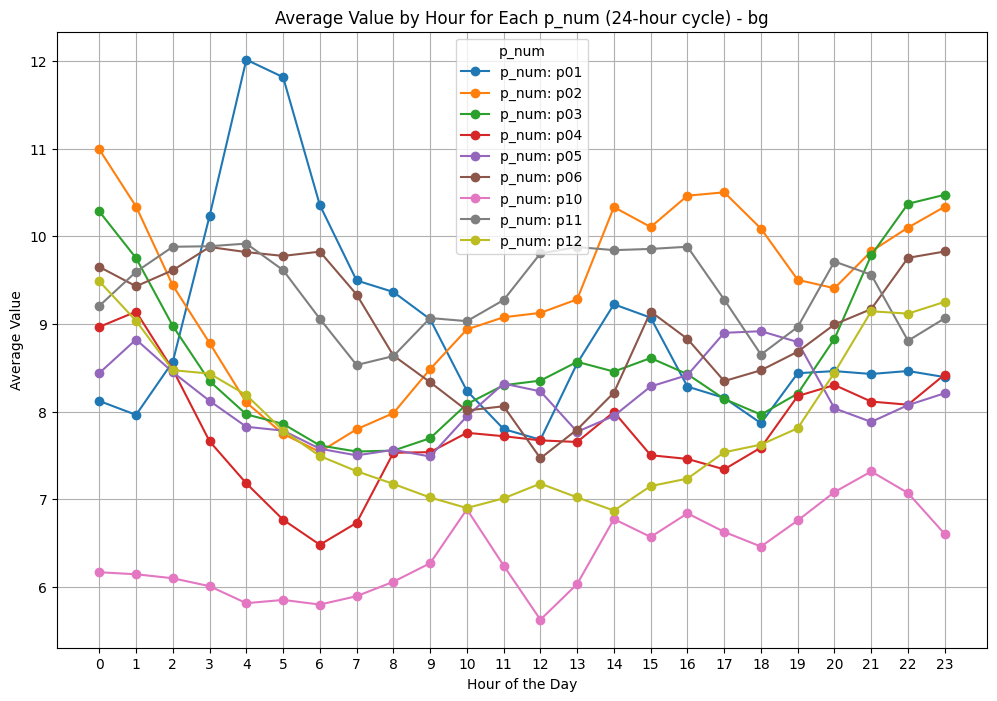

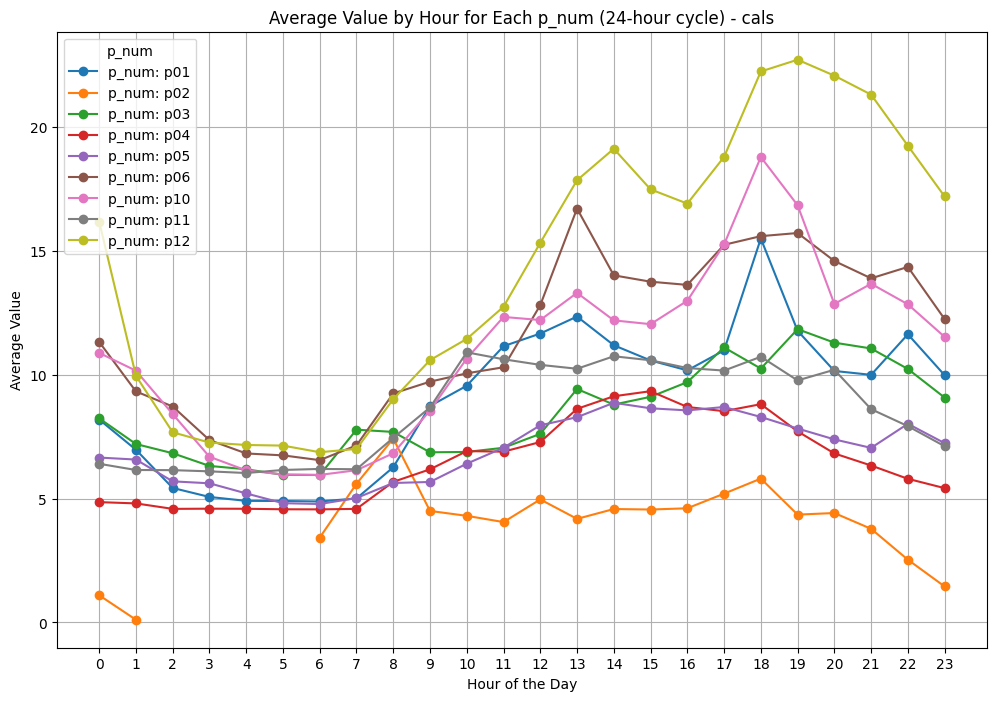

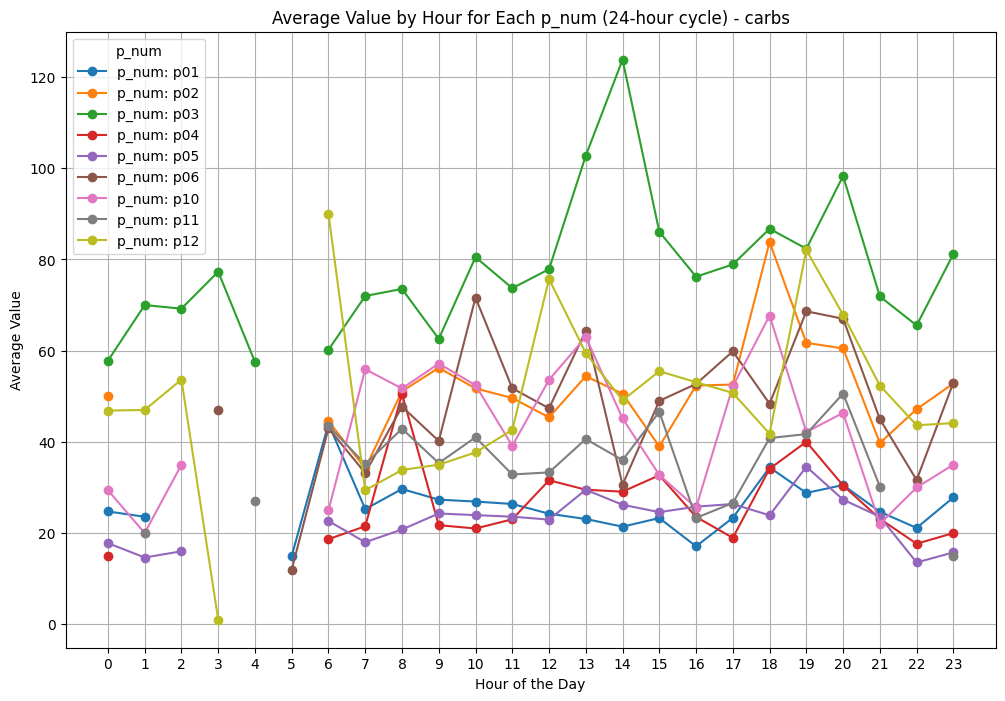

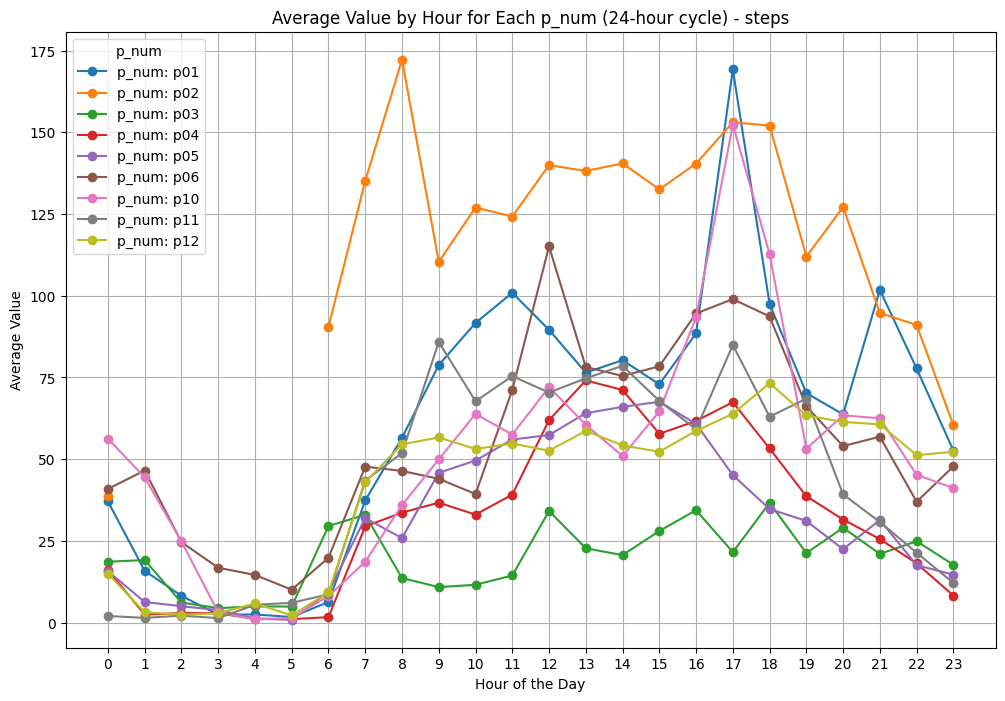

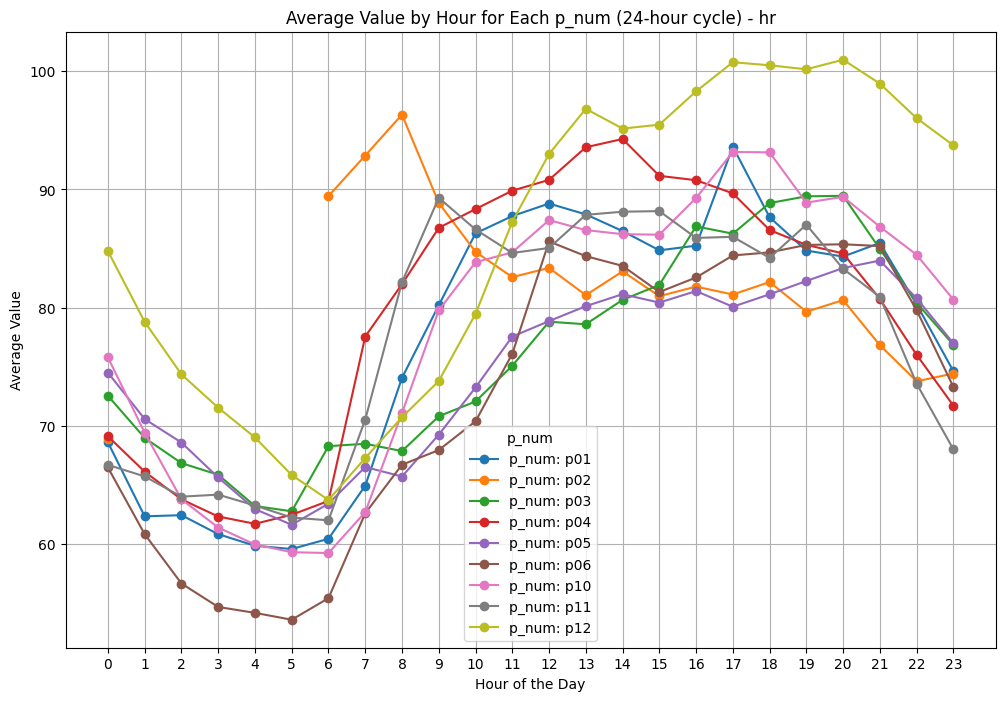

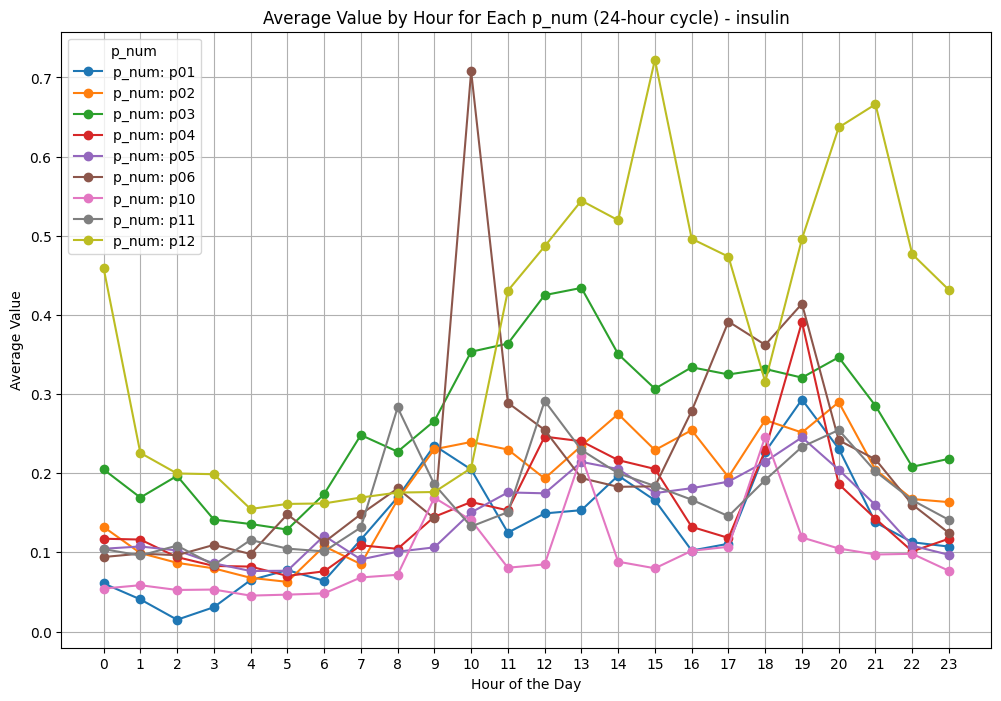

In [ ]:
from pandas.tseries.offsets import Minute
import re
import pandas as pd
import matplotlib.pyplot as plt

df = diabetes_train
if 'p_num' not in df.columns and 'p_num' not in df.index.names:
    raise ValueError("p_num column is missing from the DataFrame.")

if 'p_num' not in df.index.names:
    df.set_index('p_num', inplace=True)

df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

categories = ['bg', 'cals', 'carbs', 'steps', 'hr', 'insulin']

def process_category(category, df):
    cat_cols = [col for col in df.columns if col.startswith(category + '-')]

    time_offsets = {}
    for col in cat_cols:
        match = re.search(rf'{category}-(\d+):(\d+)', col)
        if match:
            hours, minutes = int(match.group(1)), int(match.group(2))
            total_minutes = hours * 60 + minutes
            offset = -(total_minutes)
            time_offsets[col] = offset

    time_series_list = []
    for col, offset in time_offsets.items():
        temp_df = df[['time']].copy()
        temp_df['measurement_time'] = df['time'] + Minute(offset)
        temp_df['value'] = df[col]
        temp_df['original_time'] = df['time']
        temp_df['column'] = col
        temp_df.index.name = 'p_num'
        time_series_list.append(temp_df)

    time_series_data = pd.concat(time_series_list, ignore_index=False).dropna(subset=['value'])
    time_series_data['measurement_time'] = pd.to_datetime(time_series_data['measurement_time'])
    time_series_data['hour'] = time_series_data['measurement_time'].dt.hour
    hourly_avg_by_pnum = time_series_data.groupby(['p_num', 'hour'])['value'].mean().unstack()

    return hourly_avg_by_pnum

def plot_data(hourly_avg_by_pnum, category):
    plt.figure(figsize=(12, 8))
    for p_num in hourly_avg_by_pnum.index:
        plt.plot(hourly_avg_by_pnum.columns, hourly_avg_by_pnum.loc[p_num], marker='o', label=f'p_num: {p_num}')

    plt.title(f'Average Value by Hour for Each p_num (24-hour cycle) - {category}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Value')
    plt.grid(True)
    plt.xticks(range(24))
    plt.legend(title='p_num')
    plt.show()

for category in categories:
    hourly_avg_by_pnum = process_category(category, df)
    plot_data(hourly_avg_by_pnum, category)


The hour-by-hour average line plots in sequence reveal unique time series patterns for each patient over a period of 24 hours. The plots illustrate vividly how each patient experiences typical fluctuations throughout the day.

**Blood Glucose Levels**: The chart shows distinctive patterns of glucose variation, with some patients having spikes early in the morning. Each line on the chart has distinctive spikes and dips at different hours, representing glucose responses to food or activity.

**Calories**: The graph of calorie intake shows non-uniform habits of consumption in patients. There are some with higher intakes at early moments of the day, and there are others that are at their highest in the evening. Such variations can represent personal meal times or day schedules.

**Carbohydrates**: Likewise, carbohydrate consumption also shows a non-uniform pattern with some patients having higher peaks reflecting meals rich in carbohydrates, and some maintaining the consumption evenly distributed all day long.

**Steps**: Physical activity levels, as measured by steps, detect significant differences in active and inactive periods between patients. Some have more activity in the morning or afternoon that then decreases towards evening, whereas others might have a peak during the evening.

**Heart Rate:** Heart rate patterns clearly indicate activity and resting times for each patient.

Insulin: Insulin administration charts indicate management strategies unique to each patient's daily schedule, with doses timed around meals or specific glucose levels.

Data for every patient not only show their unique lifestyle and treatment patterns but also suggest influences of their day-to-day routine on their bodily conditions.

## **Histograms**

Histograms provide a visual representation of the data distribution across different metrics such as blood glucose levels, insulin dosages, heart rate readings, calorie count and steps.

By aggregating the data and visualizing the histograms, we are focusing on the general trends and central tendencies across all subjects. This approach helps in identifying the average behavior or common patterns that might not be apparent from individual data points.

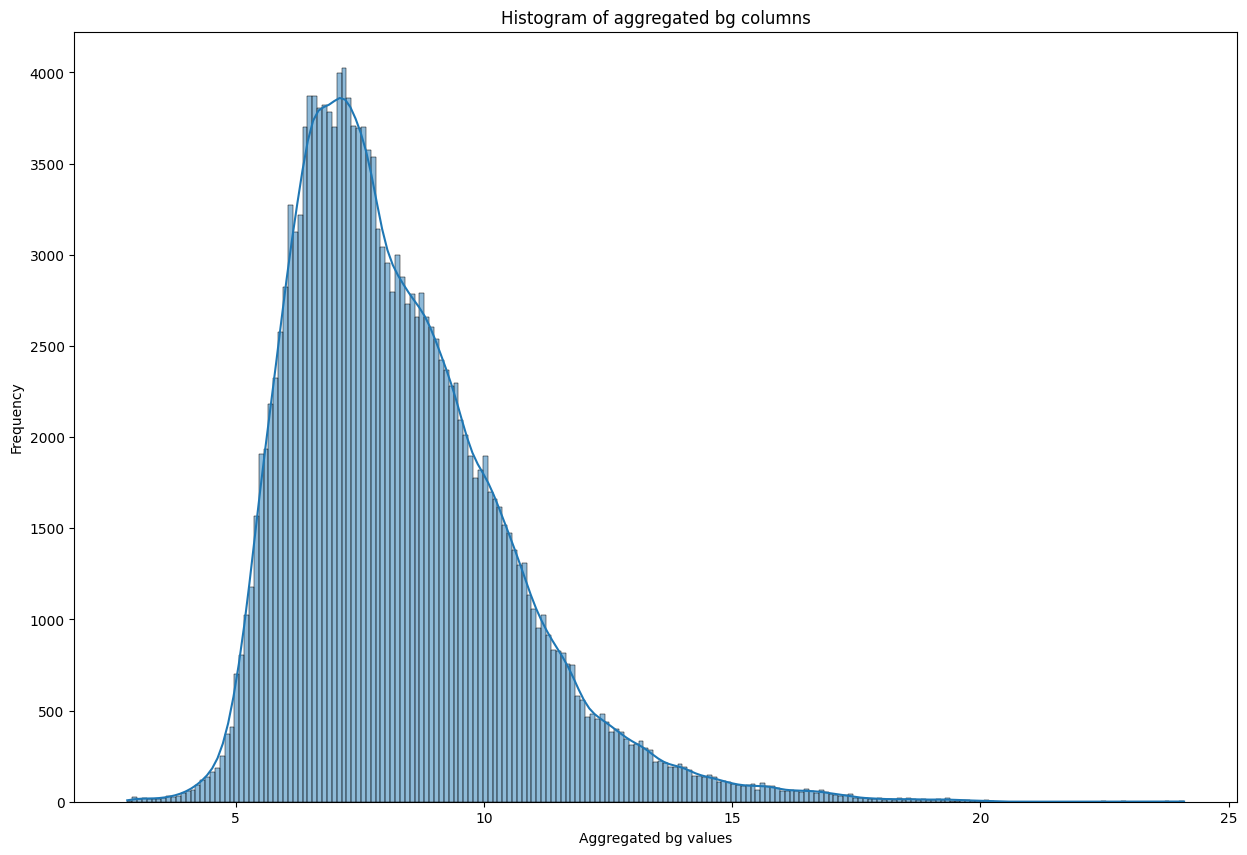

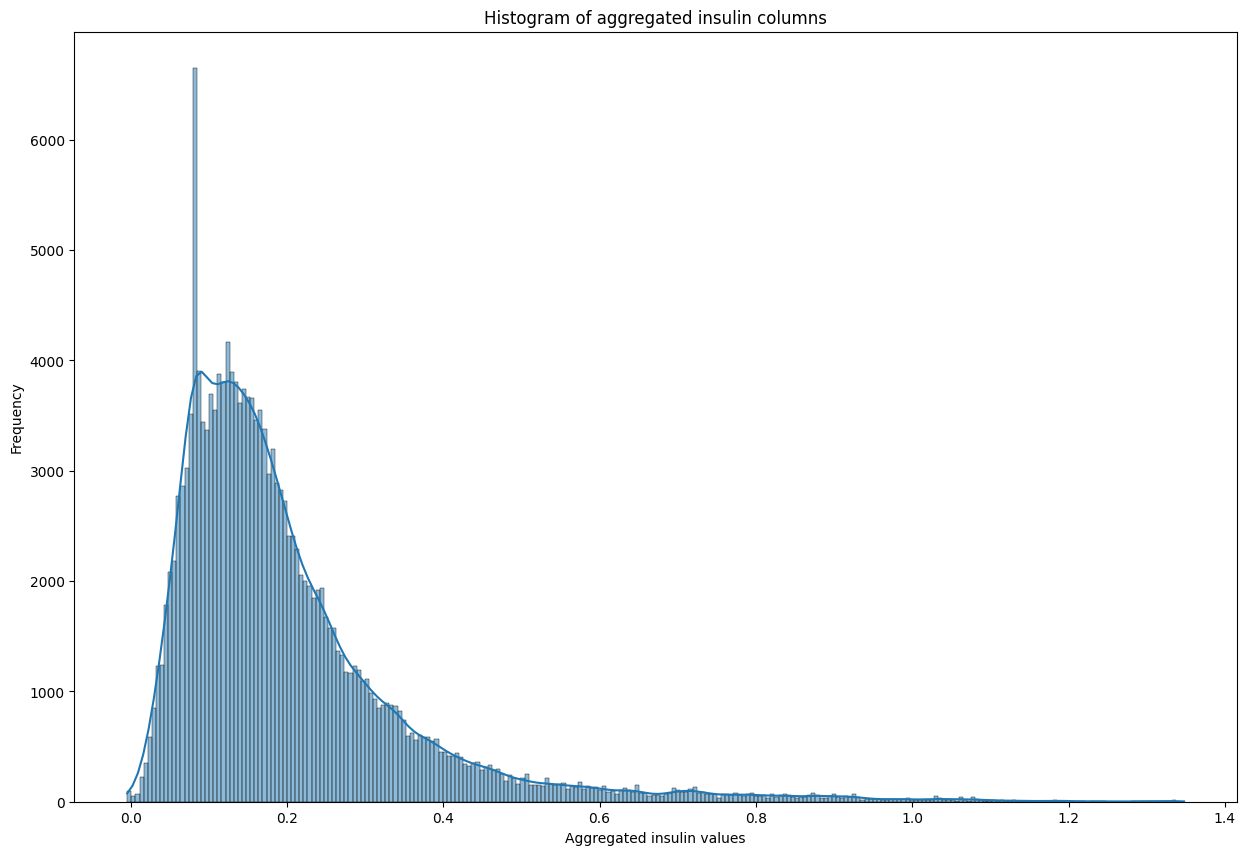

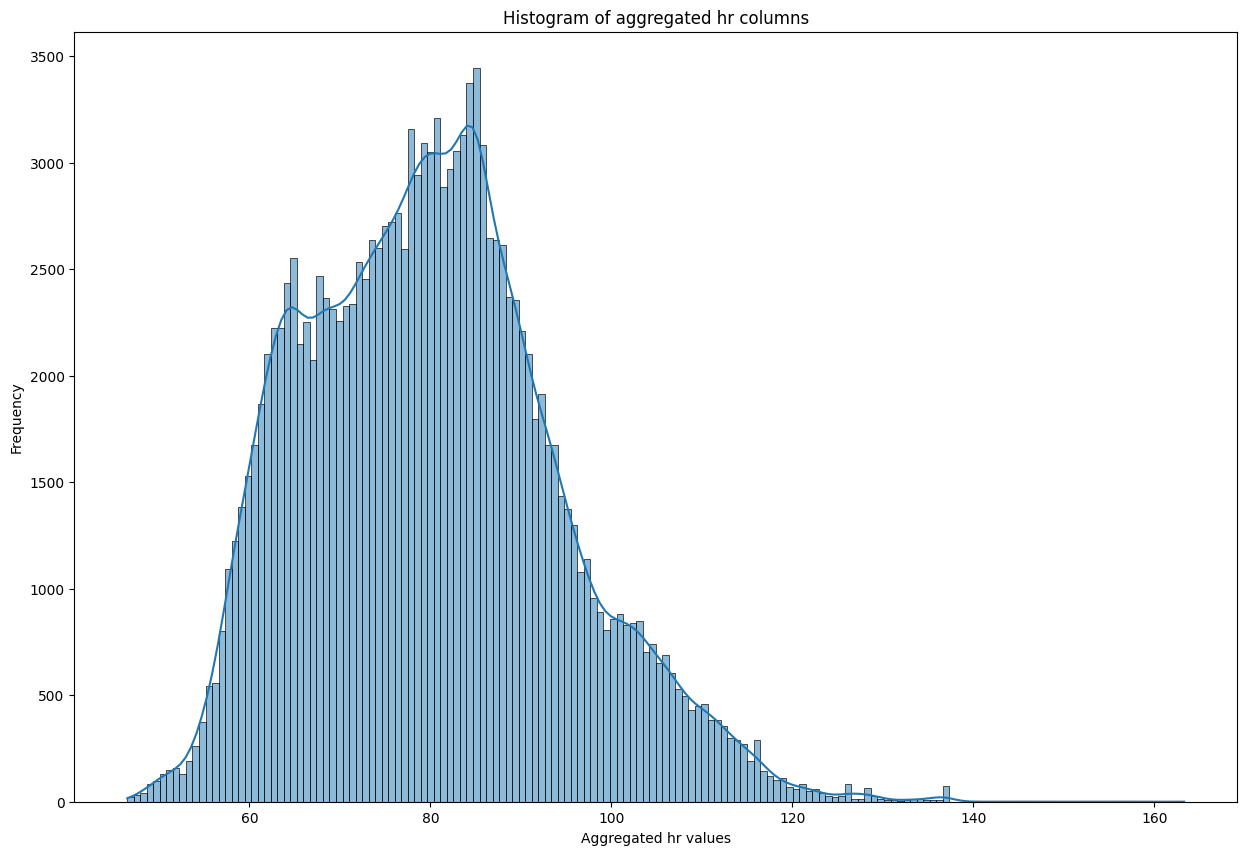

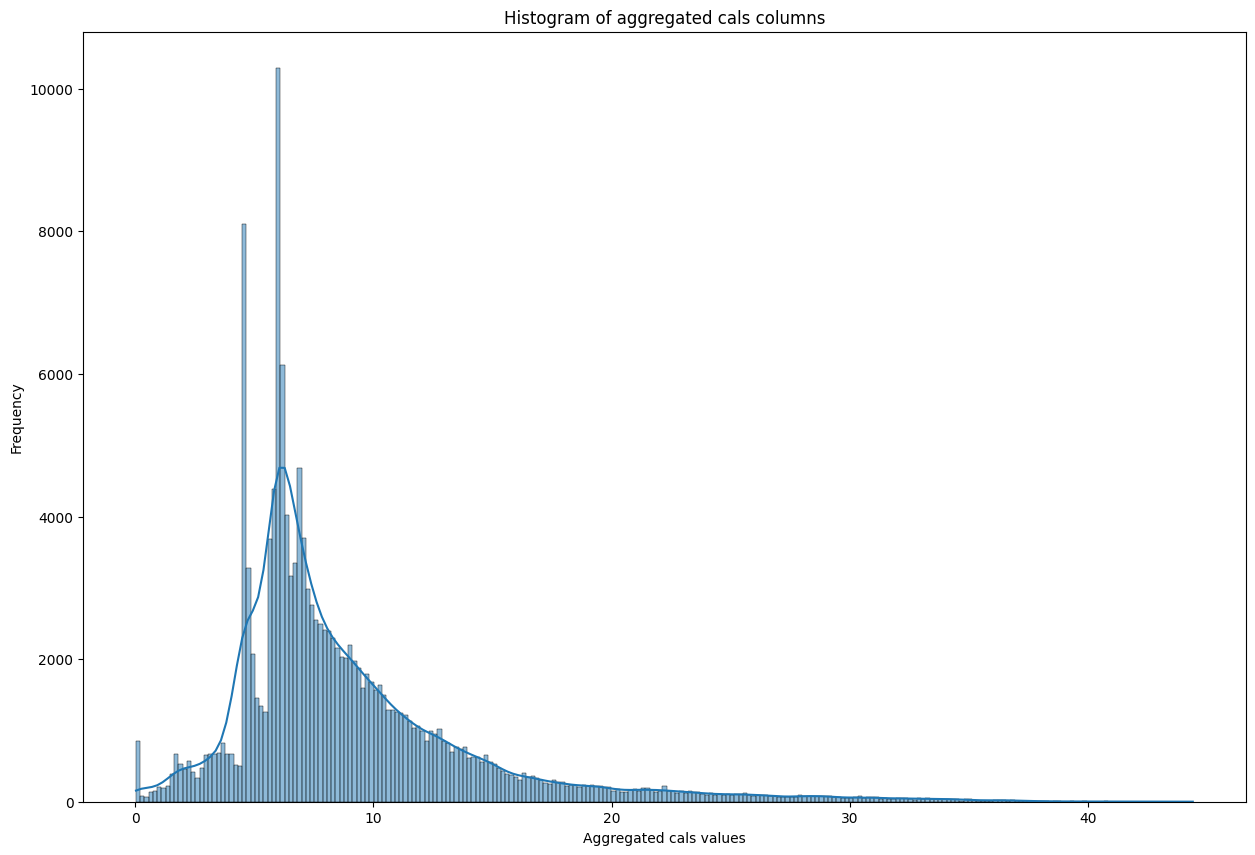

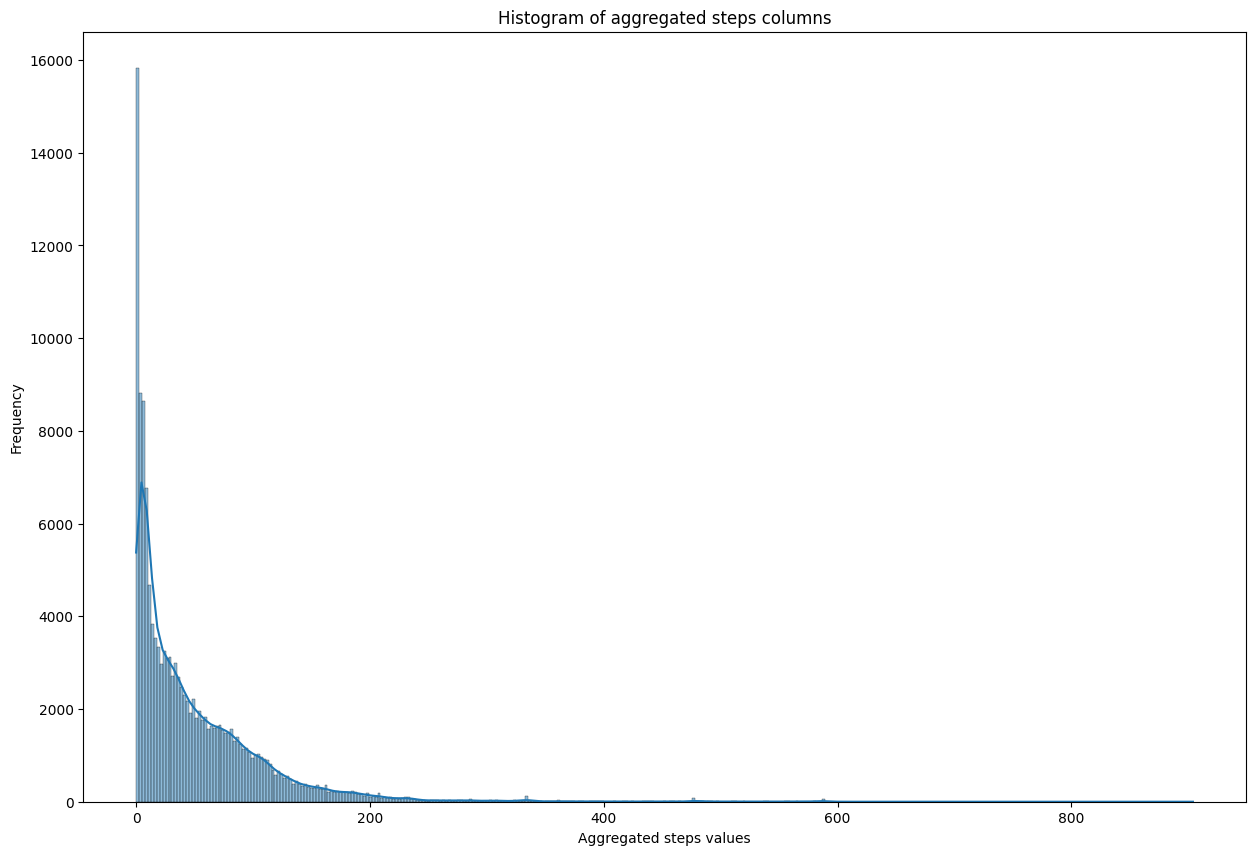

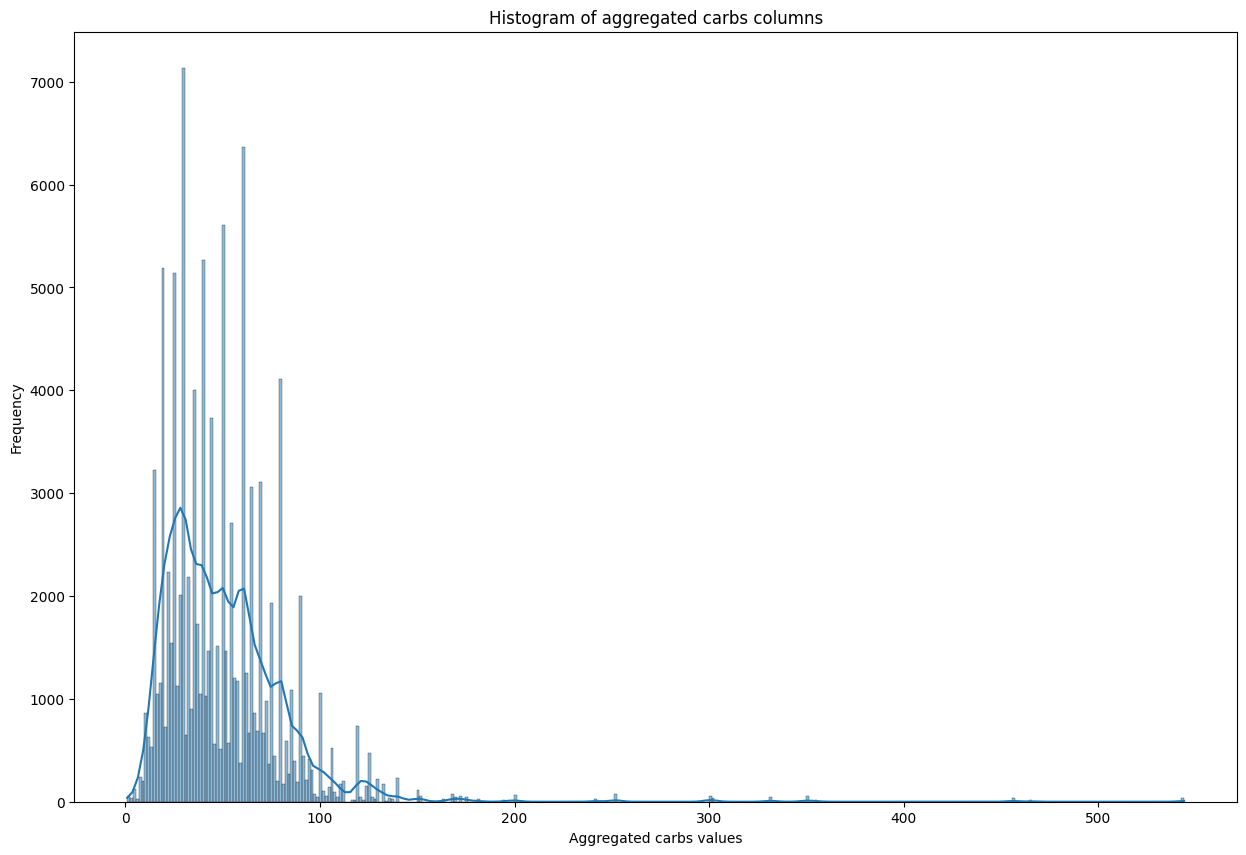

In [ ]:
patterns = ['bg', 'insulin','hr','cals','steps','carbs']

for pattern in patterns:
    pattern_columns = diabetes_train.columns[diabetes_train.columns.str.contains(pattern)]

    if not pattern_columns.empty:
        aggregated_data = diabetes_train[pattern_columns].mean(axis=1)


        plt.figure(figsize=(15, 10))
        sns.histplot(aggregated_data.dropna(), kde=True)
        plt.title(f'Histogram of aggregated {pattern} columns')
        plt.xlabel(f'Aggregated {pattern} values')
        plt.ylabel('Frequency')
        plt.show()

**Aggregated blood glucose (bg):**
The histogram displays a prominent peak around the lower end, suggesting a high frequency of lower bg values, with a long tail extending towards higher values. This indicates a general trend where most bg readings are low, but there is a significant spread, reflecting occasional higher readings.

**Aggregated insulin values:**
The insulin measurements predominantly cluster near the lower end, with a peak around 0.1, showing that most insulin dosages are minimal. The distribution's right tail extends significantly, indicating fewer instances of higher insulin dosages.

**Aggregated heart rate (hr):**
This histogram peaks around 70 to 90 beats per minute, typical for a resting or moderately active adult. The spread from 60 to around 140 beats per minute captures a range of physical states, from rest to moderate activity.

**Aggregated calorie data (cals):**
The calories histogram shows a sharp peak at the lower values, suggesting that low calorie counts are more commonly recorded in the dataset. The long tail to the right indicates occasional periods where higher calorie amounts are consumed.

Aggregated steps data: **bold text**
The steps histogram is heavily skewed towards the lower end, indicating many intervals of low to no activity. The presence of a tail extending to higher values suggests less frequent occurrences of higher activity levels.

**Aggregated carbohydrates data (carbs):**
The carbs histogram features multiple peaks, primarily concentrated at lower values, reflecting frequent lower carbohydrate intake moments. The distribution stretches out with diminishing frequency towards higher values, indicating sporadic higher carb consumption.

## **Correlation Matrix**

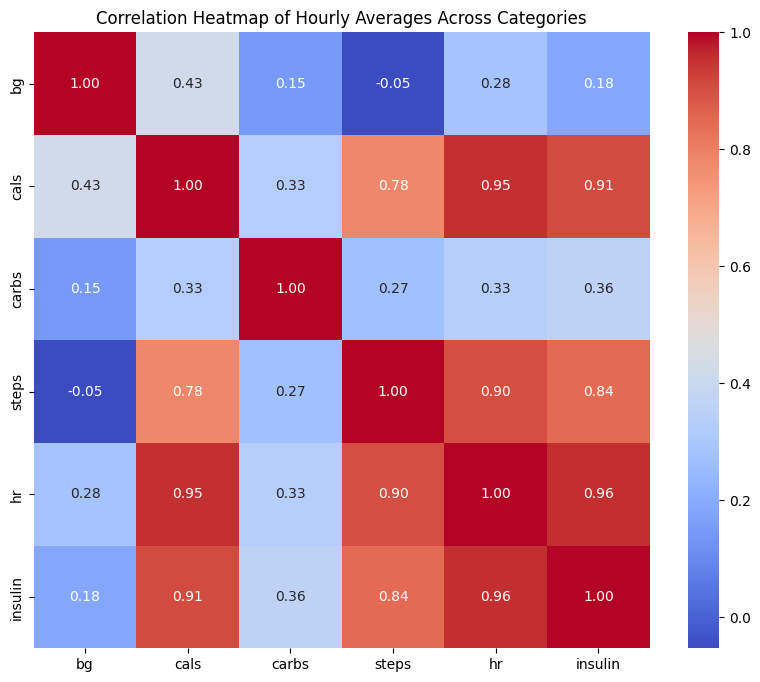

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import Minute
import re

df = diabetes_train
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

categories = ['bg', 'cals', 'carbs', 'steps', 'hr', 'insulin']

hourly_data = pd.DataFrame()

def process_category(category, df):
    cat_cols = [col for col in df.columns if col.startswith(category + '-')]

    time_offsets = {}
    for col in cat_cols:
        match = re.search(rf'{category}-(\d+):(\d+)', col)
        if match:
            hours, minutes = int(match.group(1)), int(match.group(2))
            total_minutes = hours * 60 + minutes
            offset = -(total_minutes)
            time_offsets[col] = offset

    time_series_list = []
    for col, offset in time_offsets.items():
        temp_df = df[['time']].copy()
        temp_df['measurement_time'] = df['time'] + Minute(offset)
        temp_df['value'] = df[col]
        time_series_list.append(temp_df)

    # Concatenate all dataframes and group by hour to calculate mean
    concatenated = pd.concat(time_series_list)
    concatenated['hour'] = concatenated['measurement_time'].dt.hour
    hourly_avg = concatenated.groupby('hour')['value'].mean()

    return hourly_avg

# Collect hourly data for each category
for category in categories:
    hourly_data[category] = process_category(category, df)

correlation_matrix = hourly_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Hourly Averages Across Categories')
plt.show()


The correlation heatmap shows the interrelationships among various health metrics: blood glucose (bg), calories (cals), carbohydrates (carbs), steps, heart rate (hr), and insulin. H

Heart Rate and Calories (0.95): There's a strong positive correlation between heart rate and calories.

Heart Rate and Insulin (0.96): This very strong correlation suggests that activities increasing heart rate also significantly impact insulin levels.

Steps and Calories (0.78): A positive correlation indicates that more steps typically result in higher calories burned.

Calories and Insulin (0.91): The close link between calorie and insulin levels emphasizes how physical activity can impact insulin level.

Steps and Heart Rate (0.90): A strong correlation here shows that physical activity, measured by steps, effectively raises heart rate, indicating cardiovascular engagement.

Blood Glucose and Calories (0.43): This moderate positive correlation suggests a relationship where caloric can slightly influence blood glucose levels.

Blood Glucose and Steps (-0.05): This negligible negative correlation shows that while steps might have a small effect on lowering blood glucose, the impact is not significant.

## Box Plots to Check for Outliers

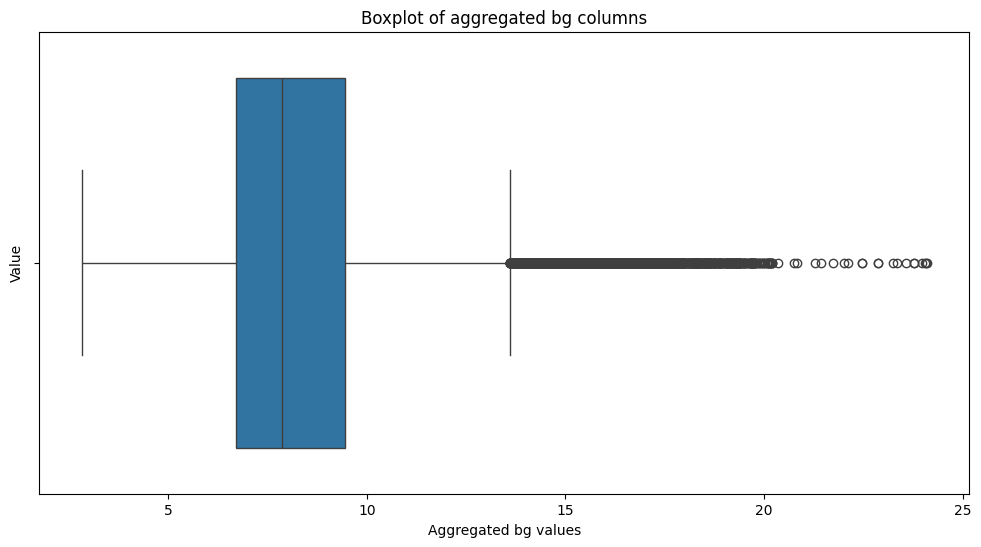

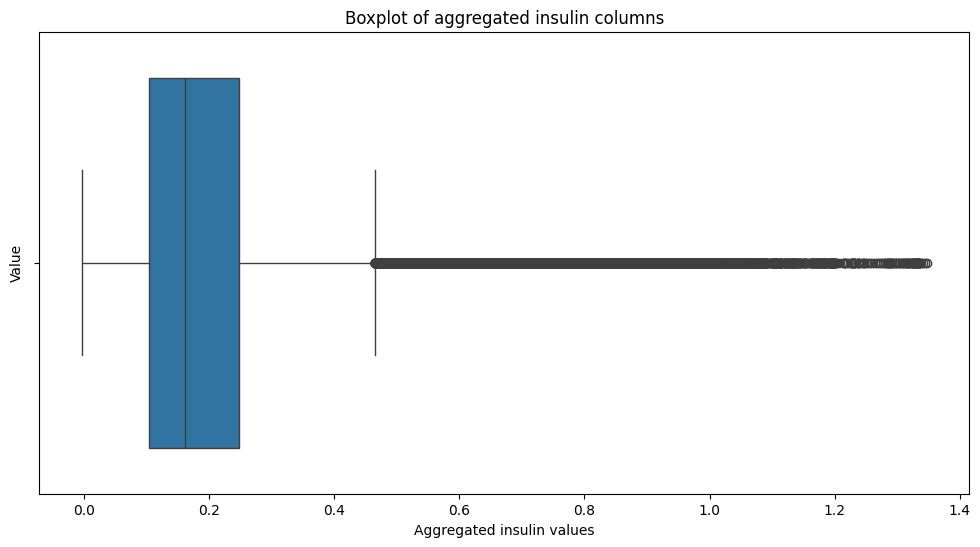

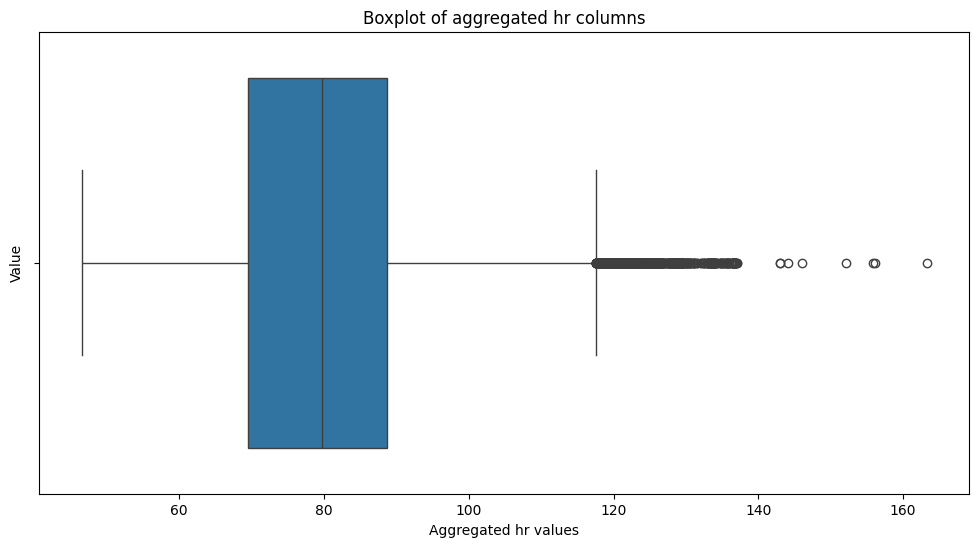

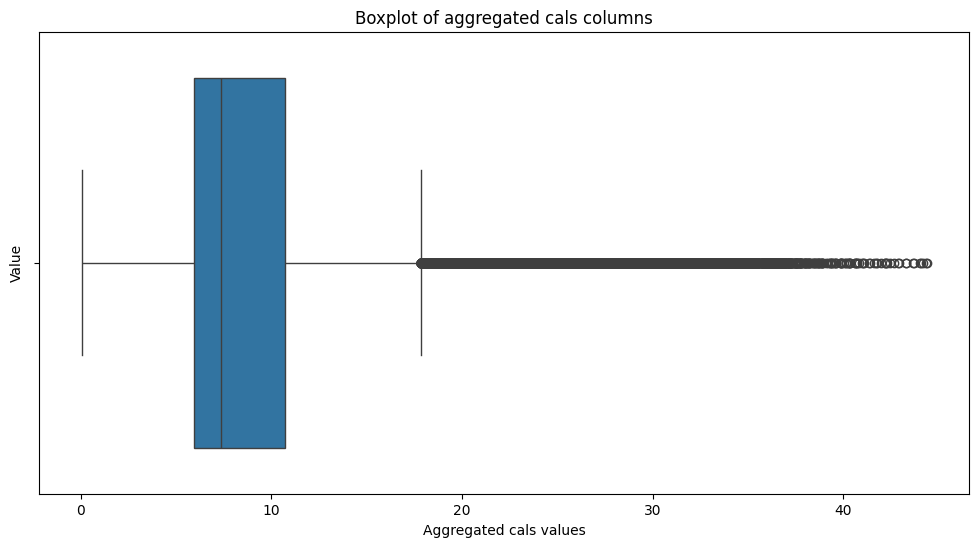

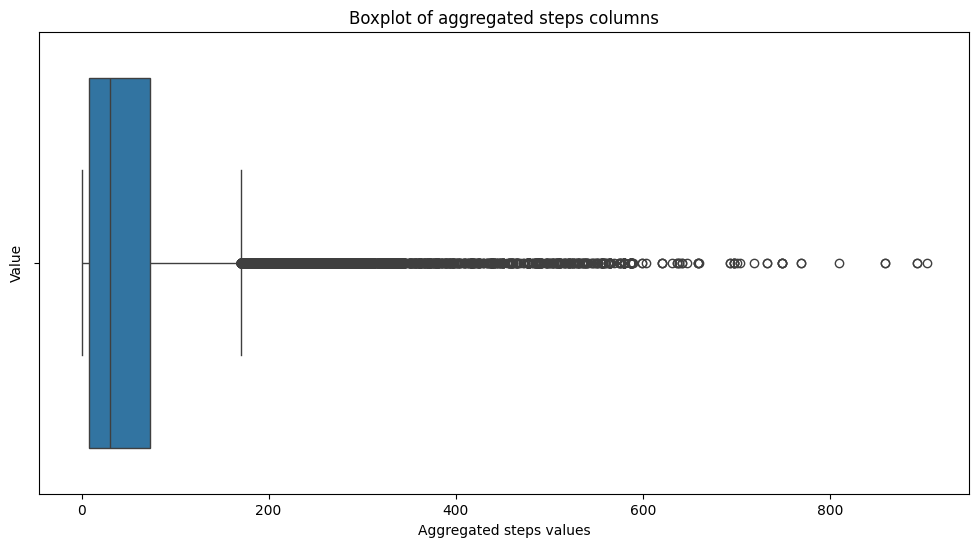

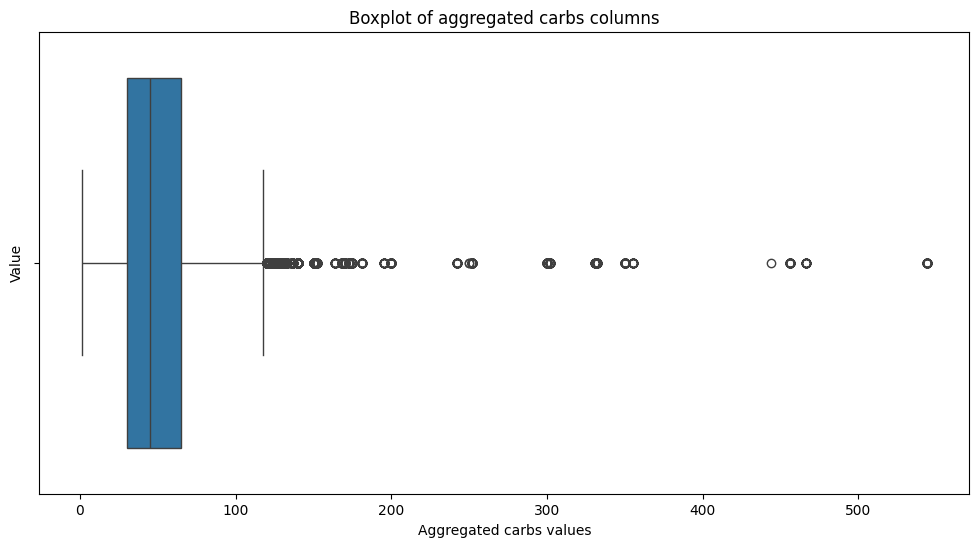

In [ ]:
patterns = ['bg', 'insulin', 'hr', 'cals', 'steps', 'carbs']

for pattern in patterns:
    pattern_columns = diabetes_train.columns[diabetes_train.columns.str.contains(pattern)]

    if not pattern_columns.empty:
        aggregated_data = diabetes_train[pattern_columns].mean(axis=1)

        # Creating a boxplot for the aggregated data
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=aggregated_data.dropna())
        plt.title(f'Boxplot of aggregated {pattern} columns')
        plt.xlabel(f'Aggregated {pattern} values')
        plt.ylabel('Value')
        plt.show()
    else:
        print(f"No columns found for pattern '{pattern}'.")



Blood Glucose (bg) Interpretation: The boxplot of grouped blood glucose values shows a distribution at 10 with some variation. The presence of numerous outliers on the high side means that there are occasional readings over the normal range that are hyperglycemic in character.

Insulin Interpretation: The boxplot of insulin indicates that most insulin values are low, bunched around zero with numerous outliers extending up to 1.4. This pattern indicates towards the fact that although regular insulin doses are low, higher doses are administered possibly because of high glucose levels.

Heart Rate (hr) Interpretation: The boxplot for heart rate is bunched up around 80 beats per minute, as in a resting adult, with the outliers reaching upwards. This would indicate variability on the basis of varying levels of physical activity.

Calories (cals) Interpretation: The boxplot for calories presents a tight middle range with lots of outliers that reach upwards, indicating elevated energy due to things like high-level exercise.

Steps Interpretation: The steps boxplot is highly skewed to the left towards lower values with an outlier tail suggesting the occasional day of significantly higher physical activity.

Carbohydrates (carbs) Explanation: The carbohydrate intake boxplot displays a tight cluster of data with a long tail of high outliers, suggesting periodic high-carb days or meals.

These outliers represent true variablity in data. Removing these values can oversimplify and give an inaccurate results. Hence we decided not to remove the outliers.

# Missing Values Imputation

## AutoRegressive Integrated Moving Average

The dataset consists of time-series data that exhibit autocorrelation, where current values can often be predicted based on previous observations.

**Understanding the Procedure**

Preparation and Initial Setup:

The code employs Python's multiprocessing library to do parallel processing, accelerating the imputation process for multiple patients and data columns.

Data Filtering: Each patient's data is split and arranged in time sequence to maintain the sequence of observations, which is a prerequisite for any time-series analysis.


Imputation Logic:

If the column contains less than 10 non-missing values, then simple median imputation is applied, with the assumption of too little data for more advanced techniques.

For the other columns, we use an ARIMA (AutoRegressive Integrated Moving Average) model as it suits data with trends or seasonality.

If ARIMA estimation fails, linear interpolation is employed as a default technique, which is a simple way of missing value estimation depending on the linear trends of the data.

Outliers or extended missing periods are handled by segment-wise analysis and interpolation.

**Challenges and Solutions:**
Missing Data in Time-Series: Missing values in time-series data are hard to deal with due to the presence of dependencies among adjoining data points. The chosen methodology, ARIMA, consider these dependencies by considering previous values to predict missing ones, maintaining the continuity and trends present in the original dataset.

Efficiency: Leveraging parallel processing, the script is able to efficiently deal with large datasets of numerous patients and measurement types.

Overall Approach: This method of imputing missing values makes sure that the imputed values are aligned with the trends and relationships that exist within the available data.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import multiprocessing as mp
import warnings
warnings.filterwarnings('ignore')

def impute_patient_series(args):
    """Function to impute missing values for a specific patient and column prefix"""
    df, p_num, prefix = args

    # Get data for this patient and sort by time
    patient_data = df[df['p_num'] == p_num].copy().sort_values('time')

    # Get all columns for this prefix, excluding the target
    cols = [col for col in patient_data.columns if col.startswith(prefix) and col != 'bg+1:00']

    if not cols:
        return (p_num, prefix, None)  # No columns for this prefix

    print(f"Imputing {prefix} columns for patient {p_num}")

    # Process each column
    results = {}
    for col in cols:
        # Skip if no missing values
        if not patient_data[col].isna().any():
            continue

        # Get the non-missing values for this column
        non_missing_idx = patient_data[col].notna()

        # If we have too few non-missing values, use median imputation
        if non_missing_idx.sum() < 10:
            median_val = patient_data[col].median()
            results[col] = ('median', median_val)
            continue

        try:
            # Fit ARIMA model on non-missing values
            y_train = patient_data.loc[non_missing_idx, col].values


            arima_order = (2, 0, 0)

            # Fit model
            model = ARIMA(y_train, order=arima_order)
            model_fit = model.fit()

            # Get indices of missing values
            missing_idx = patient_data[col].isna()

            # Handle case when there are missing values
            if missing_idx.any():
                imputed_vals = patient_data[col].interpolate(method='linear')
                imputed_vals = imputed_vals.fillna(method='bfill').fillna(method='ffill')

                # Find continuous segments of missing values
                segments = []
                start_idx = None

                for i, is_missing in enumerate(missing_idx):
                    if is_missing and start_idx is None:
                        start_idx = i
                    elif not is_missing and start_idx is not None:
                        segments.append((start_idx, i-1))
                        start_idx = None

                if start_idx is not None:
                    segments.append((start_idx, len(missing_idx)-1))

                results[col] = ('arima', (imputed_vals, segments))

        except Exception as e:
            # Fallback to linear interpolation if ARIMA fails
            imputed_vals = patient_data[col].interpolate(method='linear')
            imputed_vals = imputed_vals.fillna(method='bfill').fillna(method='ffill')
            results[col] = ('interpolation', imputed_vals)

    return (p_num, prefix, results)

def impute_missing_values_parallel(df, column_prefixes=['bg-', 'hr-', 'insulin-', 'carbs-', 'cals-', 'steps-']):
    """Impute missing values in parallel for each patient and prefix group"""
    imputed_df = df.copy()

    # Create a list of all patient-prefix combinations to process
    tasks = []
    for p_num in df['p_num'].unique():
        for prefix in column_prefixes:
            tasks.append((df, p_num, prefix))
    num_processes = max(1, mp.cpu_count() - 1)
    print(f"Using {num_processes} processes for parallel imputation")

    # Process in parallel
    with mp.Pool(processes=num_processes) as pool:
        results = pool.map(impute_patient_series, tasks)

    # Apply the results back to the dataframe
    for p_num, prefix, result in results:
        if result is None:
            continue

        for col, (method, values) in result.items():
            if method == 'median':
                imputed_df.loc[(imputed_df['p_num'] == p_num) & (imputed_df[col].isna()), col] = values
            elif method == 'arima':
                imputed_vals, segments = values
                # Apply the imputed values to the corresponding rows
                imputed_df.loc[imputed_df['p_num'] == p_num, col] = imputed_vals.values
            else:
                imputed_df.loc[imputed_df['p_num'] == p_num, col] = values.values

    return imputed_df

if __name__ == '__main__':

    prefixes = ['bg-', 'hr-', 'insulin-', 'carbs-', 'cals-', 'steps-']

    # Convert all relevant columns to numeric
    for column in diabetes_train.columns:
        if any(column.startswith(prefix) for prefix in prefixes) and column != 'bg+1:00':
            diabetes_train[column] = pd.to_numeric(diabetes_train[column], errors='coerce')

    # Check missing values before imputation
    print("\nMissing values before imputation:")
    for prefix in prefixes:
        cols = [col for col in diabetes_train.columns if col.startswith(prefix) and col != 'bg+1:00']
        total_missing = diabetes_train[cols].isna().sum().sum()
        print(f"{prefix} columns: {total_missing} missing values")

    # Impute missing values in parallel
    print("\nStarting parallel imputation of missing values...")
    diabetes_train_imputed = impute_missing_values_parallel(diabetes_train, column_prefixes=prefixes)



Missing values before imputation:
bg- columns: 1371684 missing values
hr- columns: 3709094 missing values
insulin- columns: 677556 missing values
carbs- columns: 12561854 missing values
cals- columns: 2559207 missing values
steps- columns: 6866934 missing values

Starting parallel imputation of missing values...
Using 1 processes for parallel imputation
Imputing bg- columns for patient p01
Imputing hr- columns for patient p01
Imputing insulin- columns for patient p01
Imputing carbs- columns for patient p01
Imputing cals- columns for patient p01
Imputing steps- columns for patient p01
Imputing bg- columns for patient p02
Imputing hr- columns for patient p02
Imputing insulin- columns for patient p02
Imputing carbs- columns for patient p02
Imputing cals- columns for patient p02
Imputing steps- columns for patient p02
Imputing bg- columns for patient p03
Imputing hr- columns for patient p03
Imputing insulin- columns for patient p03
Imputing carbs- columns for patient p03
Imputing cals- co

In [ ]:
print("\nMissing values after imputation:")
for prefix in prefixes:
 cols = [col for col in diabetes_train_imputed.columns if col.startswith(prefix) and col != 'bg+1:00']
 total_missing = diabetes_train_imputed[cols].isna().sum().sum()
 print(f"{prefix} columns: {total_missing} missing values")


Missing values after imputation:
bg- columns: 0 missing values
hr- columns: 0 missing values
insulin- columns: 0 missing values
carbs- columns: 0 missing values
cals- columns: 0 missing values
steps- columns: 0 missing values


In [ ]:
diabetes_train_imputed.to_csv("diabetes_train_imputed.csv", index=False)
print("\nImputed dataset saved as 'diabetes_train_imputed.csv'")


Imputed dataset saved as 'diabetes_train_imputed.csv'


## Histograms - After Imputation

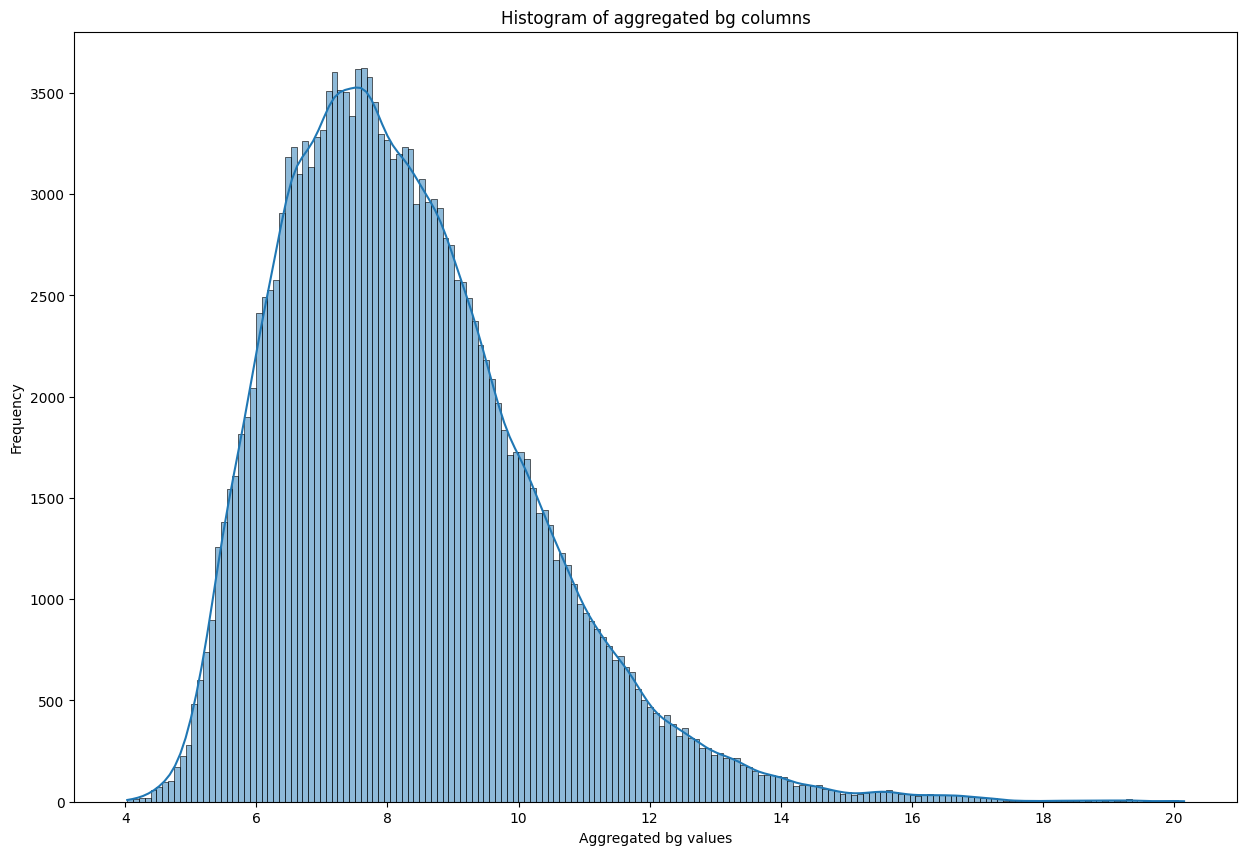

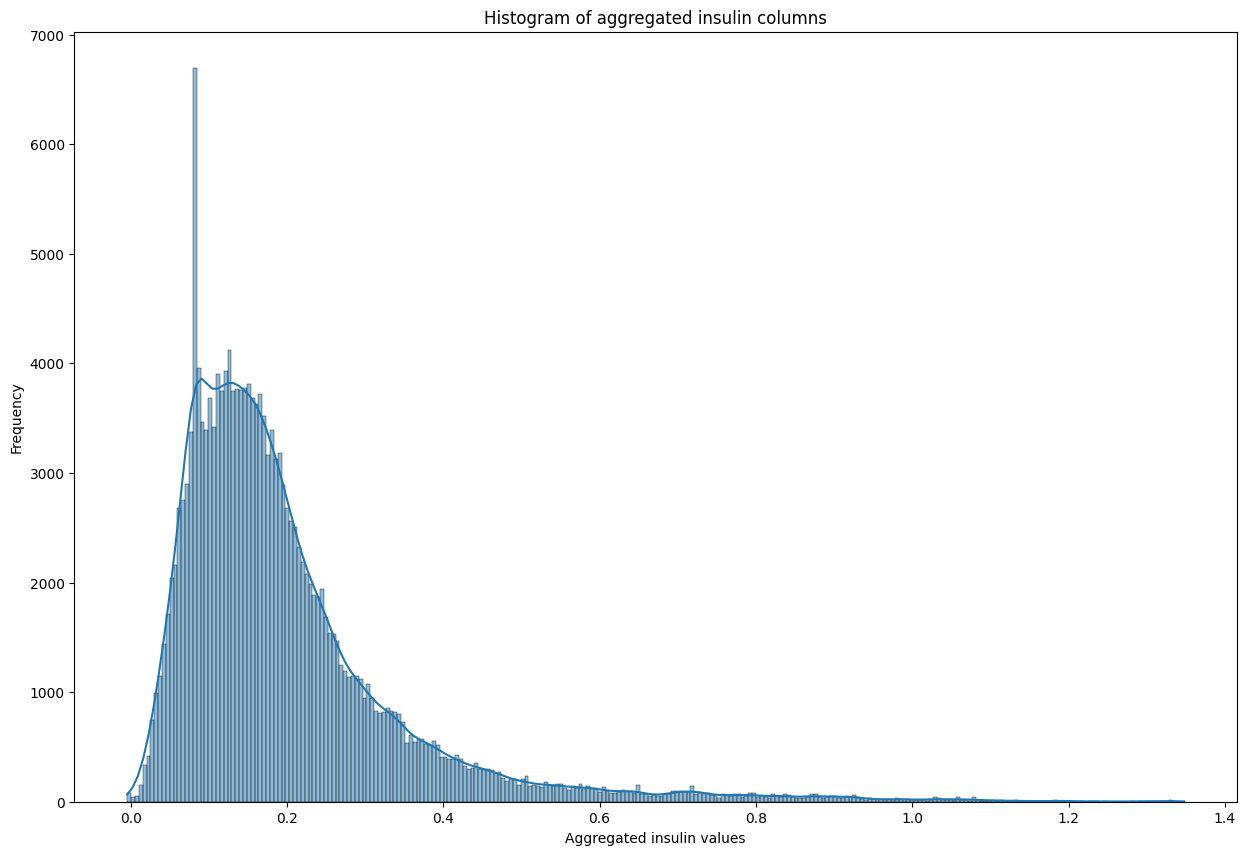

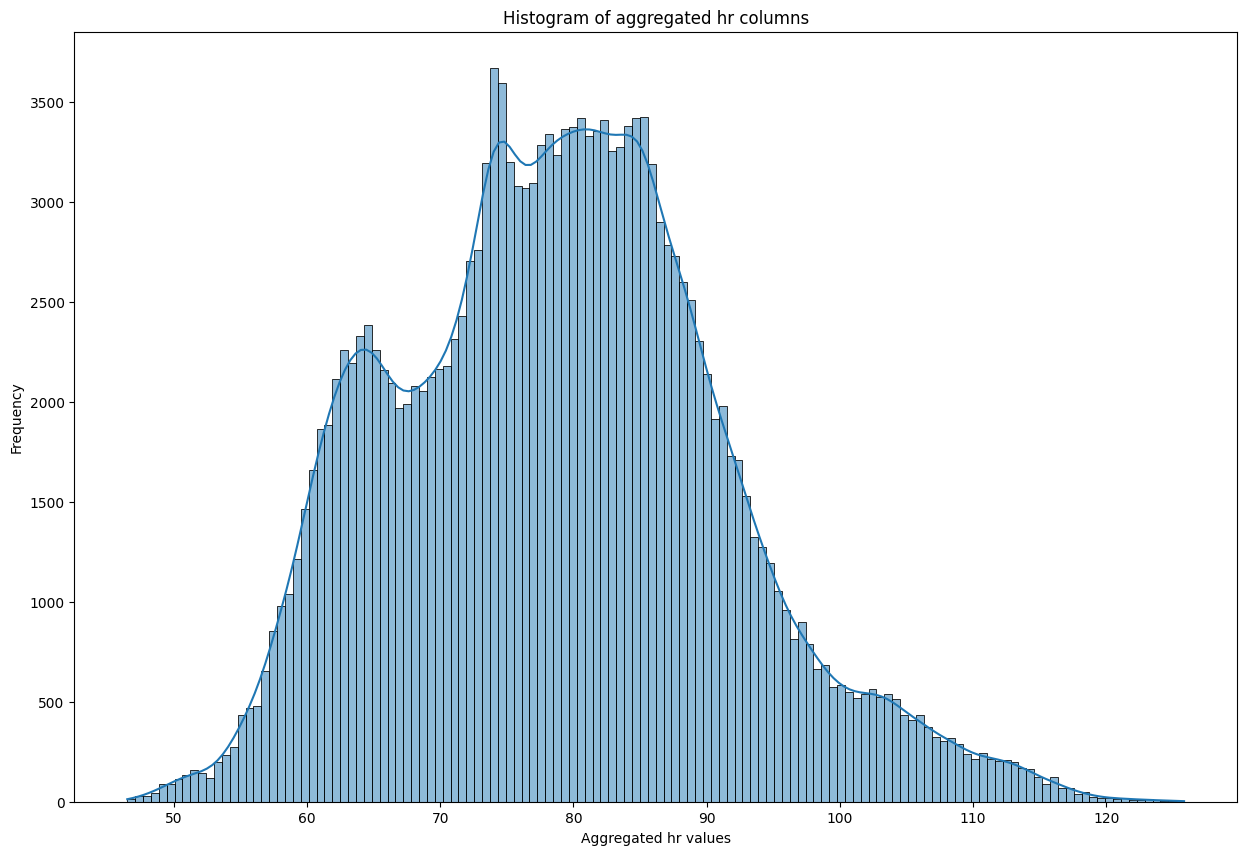

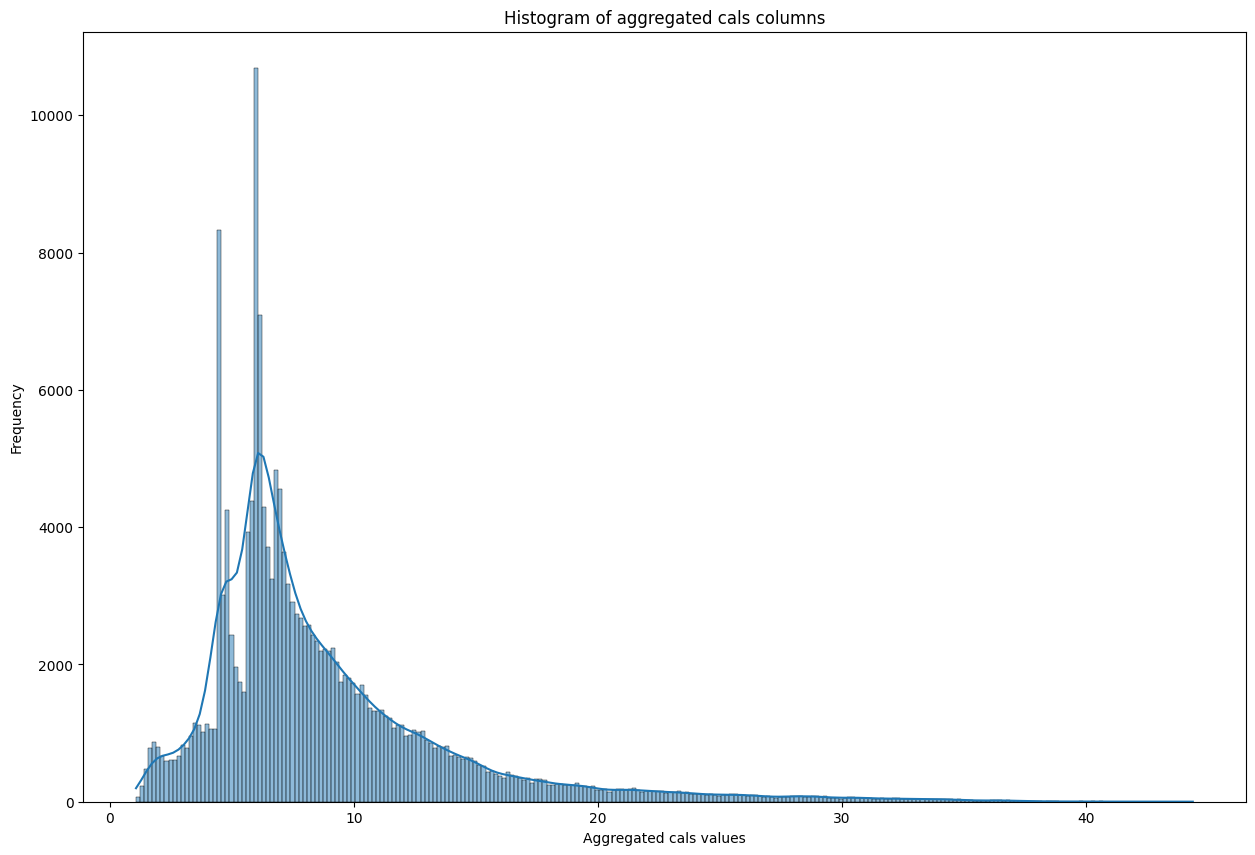

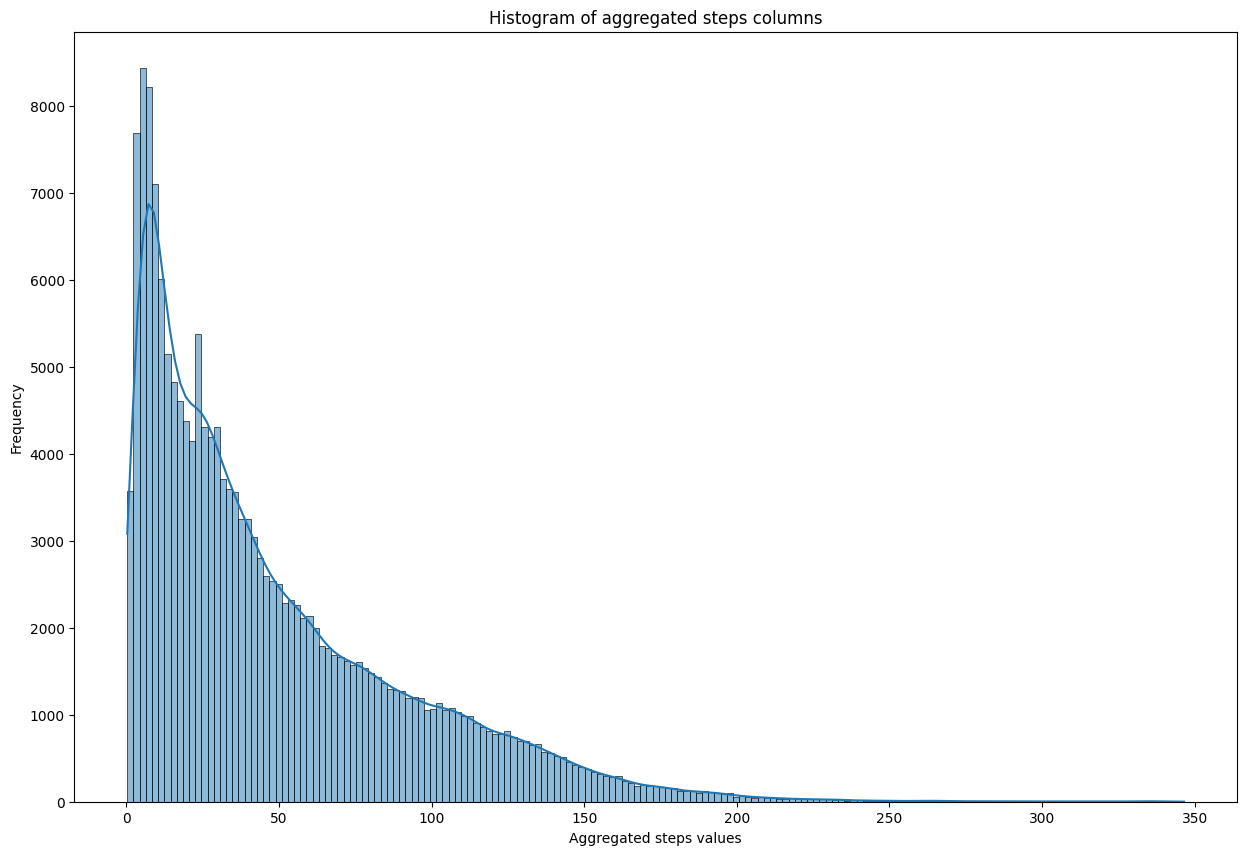

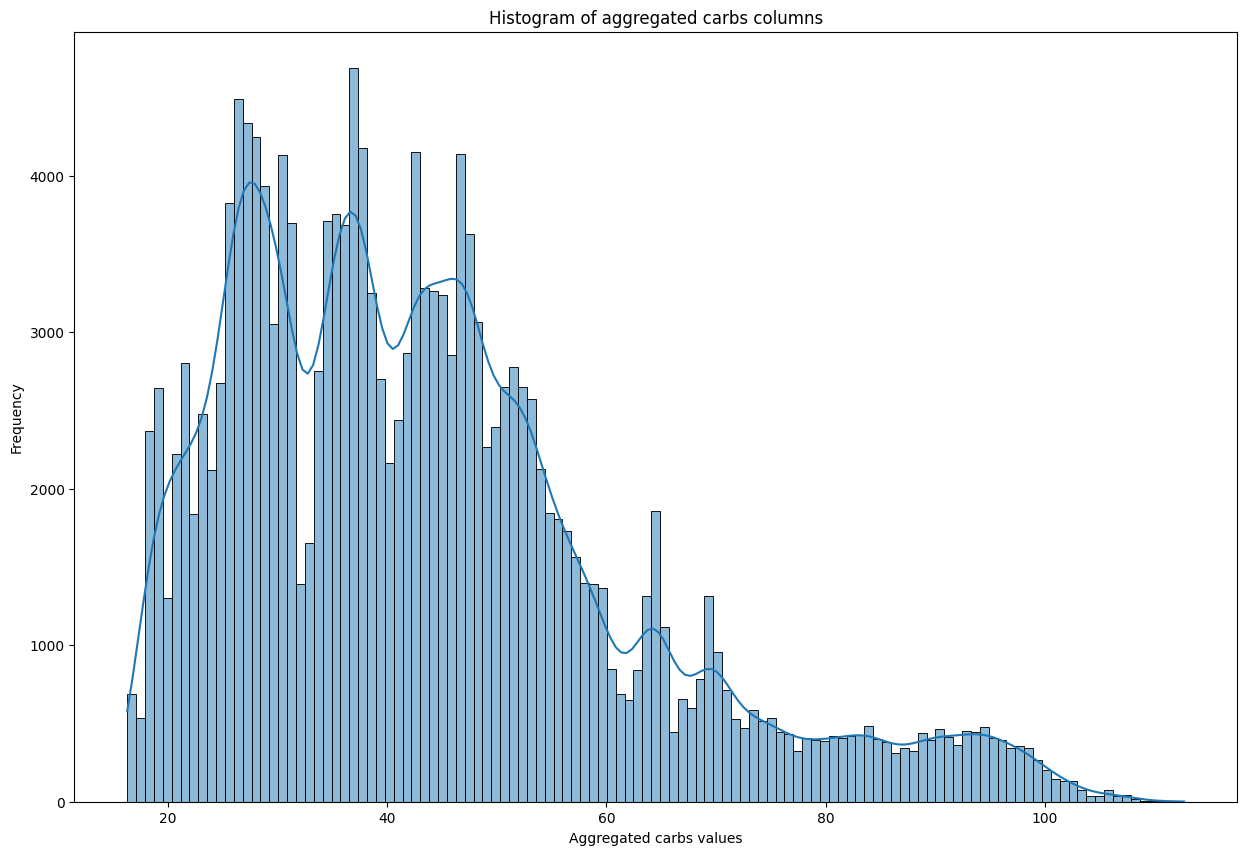

In [ ]:
patterns = ['bg', 'insulin','hr','cals','steps','carbs']

for pattern in patterns:
    pattern_columns = diabetes_train_imputed.columns[diabetes_train_imputed.columns.str.contains(pattern)]

    if not pattern_columns.empty:
        aggregated_data = diabetes_train_imputed[pattern_columns].mean(axis=1)


        plt.figure(figsize=(15, 10))
        sns.histplot(aggregated_data.dropna(), kde=True)
        plt.title(f'Histogram of aggregated {pattern} columns')
        plt.xlabel(f'Aggregated {pattern} values')
        plt.ylabel('Frequency')
        plt.show()

By looking at the before and after imputation histograms, we can see that the distributions are preserved with minor differences, which suggests that the imputation has functioned as expected in preserving the underlying structure of the data:

Blood Glucose (bg):

Distribution Before Imputation: The distribution peaked at 10, with a smooth bell-shaped curve.

After Imputation: The shape and peak of the distribution are quite alike, which indicates that imputation has retained the central tendency and distribution of the original data.

Insulin:

Before Imputation: The distribution was peaked near zero, suggesting a high frequency of lower insulin values.

After Imputation: The distribution stays mostly the same with its center at zero, keeping the original skewness towards lower values.

Heart Rate (hr):

Prior to Imputation: The distribution was normally-shaped with a peak between 70-80 beats per minute.

After Imputation: The shape is the same, peaking at the same values, suggesting that central tendency and variability have been maintained.

Calories (cals):

Before Imputation: The distribution was right-skewed with the majority of the values clustered on the lower end.
Following Imputation: The distribution is still right-skewed, indicating that imputation has not changed the overall distribution of the calorie amounts.

Steps:

Before Imputation: The histogram was strongly right-skewed with the majority of the data clustered on lower values.

After Imputation: We still notice this skewness in the after-imputation histogram, with the majority of the values still towards the lower side.

Carbohydrates (carbs):

Before Imputation: The right-skewed distribution had more than one peak, reflecting variability in carbohydrate intake.
After Imputation: The multi-modal nature and skewness of the distribution seem to be preserved.

The imputation process has been able preserve the underlying patterns in the data. In general, the imputation process did not noticeably move the distributions,this shows that the imputation approaches chosen were suitable to this data set.

# **Canonical Correlation Analysis**

In this analysis, we analyze patient data to find out how blood glucose levels relate to other health factors. We're using Canonical Correlation Analysis (CCA) to discover which variables are most connected to blood glucose during which time periods. This information is crucial because it helps us understand which factors influence blood glucose levels the most, guiding us in selecting the best features for our models that predict these levels

In [ ]:
new_df=diabetes_train_imputed

steps_columns = [col for col in new_df.columns if 'steps' in col]
bg_columns = [col for col in new_df.columns if 'bg' in col]
hr_columns = [col for col in new_df.columns if 'hr' in col]
insulin_columns = [col for col in new_df.columns if 'insulin' in col]
cals_columns = [col for col in new_df.columns if 'cals' in col]
carbs_columns = [col for col in new_df.columns if 'carbs' in col]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

group_pairs = [
    ('steps', steps_columns),
    ('hr', hr_columns),
    ('insulin', insulin_columns),
    ('cals', cals_columns),
    ('carbs', carbs_columns)
]

cca_dfs = {}

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(new_df[bg_columns])

for group_name, group_columns in group_pairs:
    if not group_columns:
        continue

    # Extract and standardize current Y variables
    Y = new_df[group_columns]
    scaler_Y = StandardScaler()
    Y_scaled = scaler_Y.fit_transform(Y)

    # Configure CCA
    n_components = min(X_scaled.shape[1], Y_scaled.shape[1])
    if n_components == 0:  # Handle edge case
        continue

    cca = CCA(n_components=n_components)
    cca.fit(X_scaled, Y_scaled)
    X_c, Y_c = cca.transform(X_scaled, Y_scaled)

    # Calculate canonical correlations between all component pairs
    correlations = np.corrcoef(X_c.T, Y_c.T)
    bg_component_count = X_c.shape[1]
    group_component_count = Y_c.shape[1]

    # Create a list to hold all correlation results
    correlation_results = []

    for i in range(bg_component_count):
        for j in range(group_component_count):
            correlation = correlations[i, X_c.shape[1] + j]  # Corrected index
            correlation_results.append({
                'BG_Variable': bg_columns[i % len(bg_columns)],  # Cycle through BG columns
                f'{group_name}_Variable': group_columns[j % len(group_columns)],  # Cycle through group columns
                'Canonical_Correlation': correlation
            })

    df = pd.DataFrame(correlation_results)

    cca_dfs[group_name] = df

def view_results(group_name):
    if group_name in cca_dfs:
        print(f"\n{'='*40}\nCCA Results for BG vs {group_name.capitalize()}\n{'='*40}")
        display(cca_dfs[group_name])
    else:
        print(f"No results available for {group_name}")



In [ ]:
view_results('steps')
view_results('hr')
view_results('insulin')
view_results('cals')
view_results('carbs')


CCA Results for BG vs Steps


,BG_Variable,steps_Variable,Canonical_Correlation
0,bg-5:55,steps-5:55,2.134138e-01
1,bg-5:55,steps-5:50,1.486873e-16
2,bg-5:55,steps-5:45,-1.146519e-16
3,bg-5:55,steps-5:40,2.591769e-17
4,bg-5:55,steps-5:35,2.190963e-17
...,...,...,...
5179,bg-0:00,steps-0:20,1.180232e-14
5180,bg-0:00,steps-0:15,-1.290527e-11
5181,bg-0:00,steps-0:10,3.766575e-11
5182,bg-0:00,steps-0:05,-5.691737e-08



CCA Results for BG vs Hr


,BG_Variable,hr_Variable,Canonical_Correlation
0,bg-5:55,hr-5:55,2.616410e-01
1,bg-5:55,hr-5:50,5.971362e-16
2,bg-5:55,hr-5:45,7.201146e-17
3,bg-5:55,hr-5:40,-6.349026e-17
4,bg-5:55,hr-5:35,-3.081891e-16
...,...,...,...
5179,bg-0:00,hr-0:20,-6.088631e-13
5180,bg-0:00,hr-0:15,-2.078138e-09
5181,bg-0:00,hr-0:10,1.556205e-10
5182,bg-0:00,hr-0:05,3.936703e-07



CCA Results for BG vs Insulin


,BG_Variable,insulin_Variable,Canonical_Correlation
0,bg-5:55,insulin-5:55,1.988189e-01
1,bg-5:55,insulin-5:50,7.337570e-17
2,bg-5:55,insulin-5:45,-1.050437e-16
3,bg-5:55,insulin-5:40,1.183590e-17
4,bg-5:55,insulin-5:35,-2.413158e-16
...,...,...,...
5179,bg-0:00,insulin-0:20,7.950217e-18
5180,bg-0:00,insulin-0:15,2.492063e-15
5181,bg-0:00,insulin-0:10,-5.013732e-12
5182,bg-0:00,insulin-0:05,1.109972e-08



CCA Results for BG vs Cals


,BG_Variable,cals_Variable,Canonical_Correlation
0,bg-5:55,cals-5:55,2.425205e-01
1,bg-5:55,cals-5:50,-2.940542e-16
2,bg-5:55,cals-5:45,2.195993e-16
3,bg-5:55,cals-5:40,-1.167417e-16
4,bg-5:55,cals-5:35,1.467289e-16
...,...,...,...
5179,bg-0:00,cals-0:20,8.654729e-15
5180,bg-0:00,cals-0:15,3.667391e-12
5181,bg-0:00,cals-0:10,-5.504468e-09
5182,bg-0:00,cals-0:05,-1.852206e-07



CCA Results for BG vs Carbs


,BG_Variable,carbs_Variable,Canonical_Correlation
0,bg-5:55,carbs-5:55,4.384458e-01
1,bg-5:55,carbs-5:50,2.419800e-15
2,bg-5:55,carbs-5:45,-2.882523e-15
3,bg-5:55,carbs-5:40,8.019008e-16
4,bg-5:55,carbs-5:35,1.046579e-15
...,...,...,...
5179,bg-0:00,carbs-0:20,-8.153089e-18
5180,bg-0:00,carbs-0:15,2.025013e-12
5181,bg-0:00,carbs-0:10,-2.934227e-08
5182,bg-0:00,carbs-0:05,-1.663025e-07


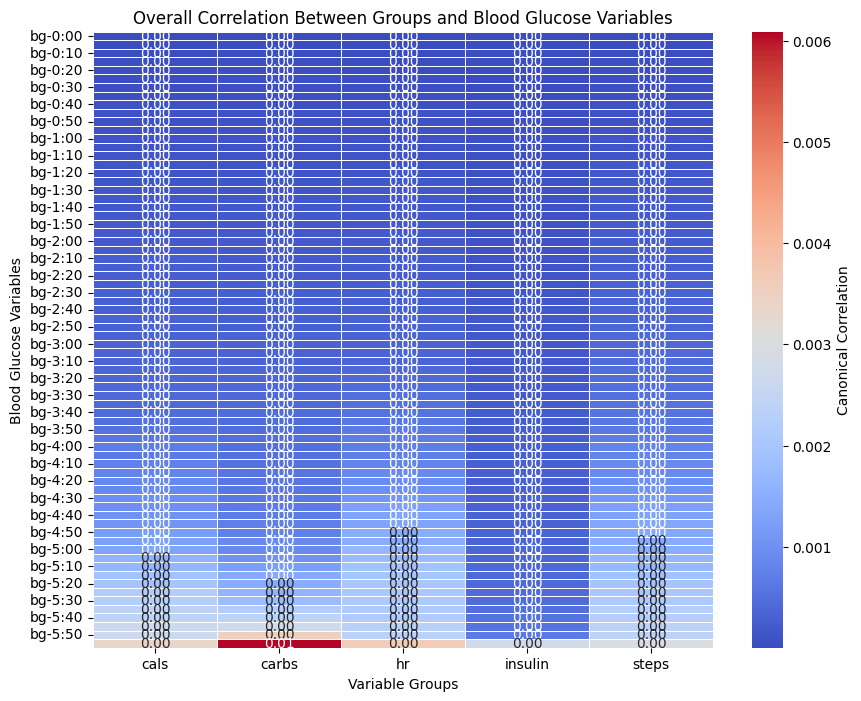

In [ ]:
overall_correlation_df = pd.concat(
    cca_dfs.values(), keys=cca_dfs.keys(), names=["Group", "Index"]
).reset_index()

heatmap_data = overall_correlation_df.pivot_table(
    index="BG_Variable", columns="Group", values="Canonical_Correlation", aggfunc="mean"
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Canonical Correlation"},
)
plt.title("Overall Correlation Between Groups and Blood Glucose Variables")
plt.xlabel("Variable Groups")
plt.ylabel("Blood Glucose Variables")
plt.show()

# **Predictive Modelling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from statsmodels.tsa.arima.model import ARIMA

## Time Series Modeling with Covariates

In [ ]:
for column in diabetes_train_imputed.columns:
    if any(column.startswith(prefix) for prefix in prefixes) and column != 'bg+1:00':
        diabetes_train_imputed[column] = pd.to_numeric(diabetes_train_imputed[column], errors='coerce')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

patient_ids = diabetes_train_imputed['p_num'].unique()

train_patient_ids, test_patient_ids = train_test_split(patient_ids, test_size=0.3, random_state=42)

train_df = diabetes_train_imputed[diabetes_train_imputed['p_num'].isin(train_patient_ids)].copy()
test_df = diabetes_train_imputed[diabetes_train_imputed['p_num'].isin(test_patient_ids)].copy()

print("Number of rows in training set:", len(train_df))
print("Number of rows in testing set:", len(test_df))


Number of rows in training set: 118214
Number of rows in testing set: 58810


### Data Preprocessing

In [ ]:
numerical_cols = train_df.select_dtypes(include=np.number).columns
scaler = StandardScaler()

cols_to_scale = [col for col in numerical_cols if col not in ['p_num','id','time','bg+1:00']]
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

# --- Convert 'time' to numerical representation ---
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

train_df['time_seconds'] = train_df['time'].apply(time_to_seconds)
test_df['time_seconds'] = test_df['time'].apply(time_to_seconds)
train_df['time_seconds'] = scaler.fit_transform(train_df[['time_seconds']])
test_df['time_seconds'] = scaler.transform(test_df[['time_seconds']])

# --- Selected Covariates ---
bg_cols = [col for col in train_df.columns if col.startswith('bg-')]
insulin_cols = [col for col in train_df.columns if col.startswith('insulin-')]
carbs_cols = [col for col in train_df.columns if col.startswith('carbs-')]
hr_cols = [col for col in train_df.columns if col.startswith('hr-')]
steps_cols = [col for col in train_df.columns if col.startswith('steps-')]
cals_cols = [col for col in train_df.columns if col.startswith('cals-')]

selected_covariates = bg_cols + insulin_cols + carbs_cols + hr_cols + steps_cols + cals_cols + ['time_seconds']


In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(df, p_num, covariates, target='bg+1:00', arima_order=(5, 0, 0)):
    patient_data = df[df['p_num'] == p_num].sort_values('time_seconds')  # Sort by time

    # Prepare data for ARIMA
    y = patient_data[target].values
    X = patient_data[covariates].values

    try:
        # Fit ARIMA model with exogenous regressors (covariates)
        model = ARIMA(y, exog=X, order=arima_order)
        model_fit = model.fit()
        print(f"ARIMA model fitted successfully for patient {p_num}")
        return model_fit
    except Exception as e:
        print(f"Error fitting ARIMA for patient {p_num}: {e}")
        return None

def predict_bg_one_hour(test_df, arima_models, selected_covariates):
    """Predicts bg+1:00 for the test set using the fitted ARIMA models."""
    test_df['bg+1:00_pred_ARIMA']= np.nan  # Initialize the prediction column

    for p_num in test_df['p_num'].unique():
        patient_data = test_df[test_df['p_num'] == p_num].sort_values('time_seconds')
        X = patient_data[selected_covariates].values


        arima_model = arima_models.get(p_num)

        if arima_model is not None:
            try:
                # Predict the blood glucose level for the next hour
                predictions = arima_model.predict(start=0, end=len(patient_data) - 1, exog=X)
                test_df.loc[test_df['p_num'] == p_num, 'bg+1:00_predicted'] = predictions
            except Exception as e:
                print(f"Error predicting for patient {p_num}: {e}")
        else:
            print(f"No ARIMA model found for patient {p_num}")

    return test_df

arima_models = {}
for p_num in train_df['p_num'].unique():
    model = fit_arima_model(train_df, p_num, selected_covariates)
    arima_models[p_num] = model


ARIMA model fitted successfully for patient p01
ARIMA model fitted successfully for patient p03
ARIMA model fitted successfully for patient p04
ARIMA model fitted successfully for patient p05
ARIMA model fitted successfully for patient p10
ARIMA model fitted successfully for patient p12


In [ ]:
# Prediction on the Test Set
test_df = predict_bg_one_hour(test_df, arima_models, selected_covariates)

print(test_df[['id', 'p_num', 'time', 'bg+1:00_predicted']].head())

NameError: name 'predict_bg_one_hour' is not defined